In [ ]:
import pandas as pd

file_path = '/content/data_processed.csv'
data1 = pd.read_csv(file_path)

In [ ]:
# Seleccionar solo las columnas numéricas del DataFrame
data = data1.select_dtypes(include='number')
#Elimina una columna en data
data = data.drop(columns=['FM Gap Time', 'FCE Waiting Time', 'FCE2 Charging Space Time'])

In [ ]:
# count values de steel type
data['steel_type'].value_counts()

,count
steel_type,
2,22275
0,13797
1,13416
3,7107


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# --------- Bloque 1: Tratamiento de Outliers usando el Rango Intercuartílico (IQR) ---------

# Calcular el IQR y los límites
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# Limites superior e inferior para detectar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remover outliers reemplazándolos con NaN
data_iqr_treated = data.mask((data < lower_bound) | (data > upper_bound))

# Rellenar los NaN resultantes si se desea, por ejemplo, usando la mediana
data_iqr_treated.fillna(data.median(), inplace=True)


# --------- Bloque 2: Tratamiento de Outliers usando Normalización ---------

# Escalar el DataFrame
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
data_normalized = pd.DataFrame(data_scaled, columns=data.columns)

# Opcional: Para datos escalados, puedes reemplazar los valores que estén a más de 3 desviaciones estándar de la media
# con los límites de 3 desviaciones estándar.
data_normalized[(data_normalized > 3) | (data_normalized < -3)] = np.sign(data_normalized) * 3


# --------- Bloque 3: Comparación de los Resultados ---------

# Comparación de las medias de cada método de tratamiento para observar los efectos
comparison_df = pd.DataFrame({
    "Original_Mean": data.mean(),
    "IQR_Treated_Mean": data_iqr_treated.mean(),
    "Normalized_Mean": data_normalized.mean()
})

print("Comparación de las medias antes y después de los tratamientos de outliers:")
print(comparison_df)

Comparación de las medias antes y después de los tratamientos de outliers:
                             Original_Mean  IQR_Treated_Mean  Normalized_Mean
FCE Number                        1.499655          1.499655     3.156294e-16
Slab Width                     1420.717502       1420.717502    -2.812290e-17
Slab Thickness                  219.554607        217.790211    -8.461590e-04
Slab Lenght                    9883.603993       9883.603993     2.531061e-16
Slab Weight                      23.393231         23.392682    -2.540658e-05
slab_width_charge              1075.658486       1075.658486     8.035115e-18
Commander Slab Speed             21.186792         21.172276     2.081747e-03
PC Width                       1470.735878       1470.735878    -2.430622e-16
PC Thickness                    225.089195        223.131496    -8.999329e-16
PC Length                      9586.526036       9586.907059    -6.187039e-16
Coil Thickness                    4.974317          4.395177    -1.

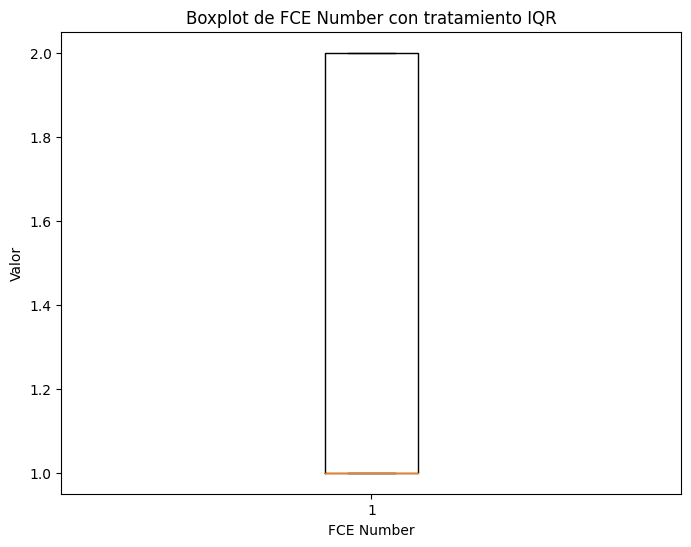

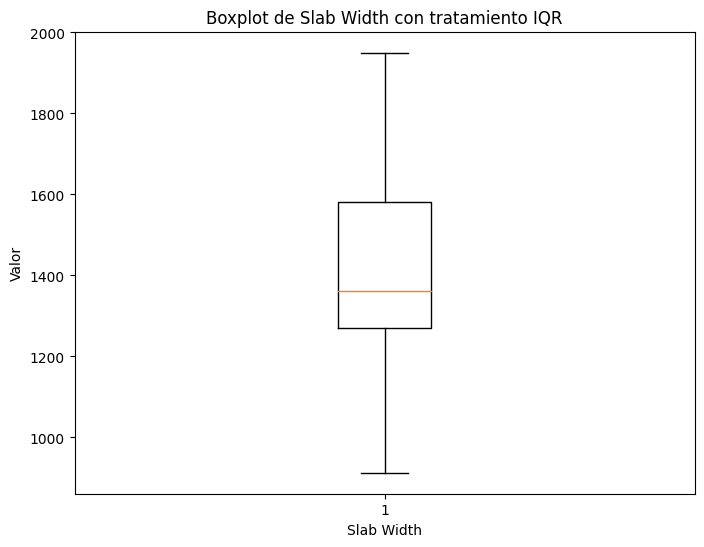

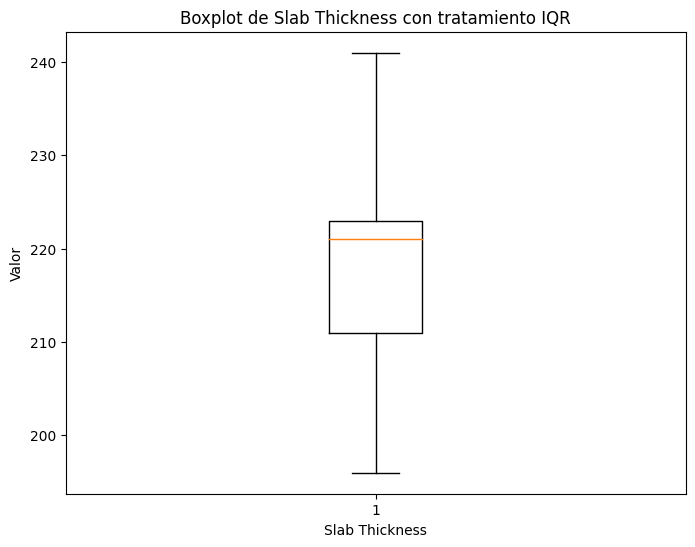

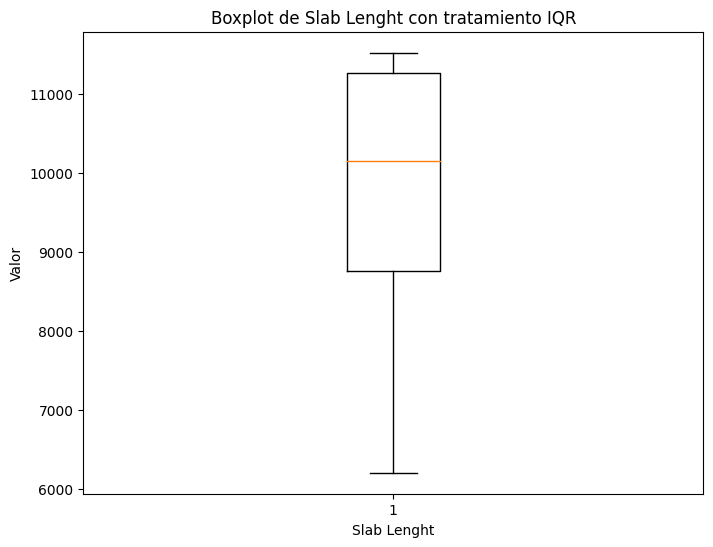

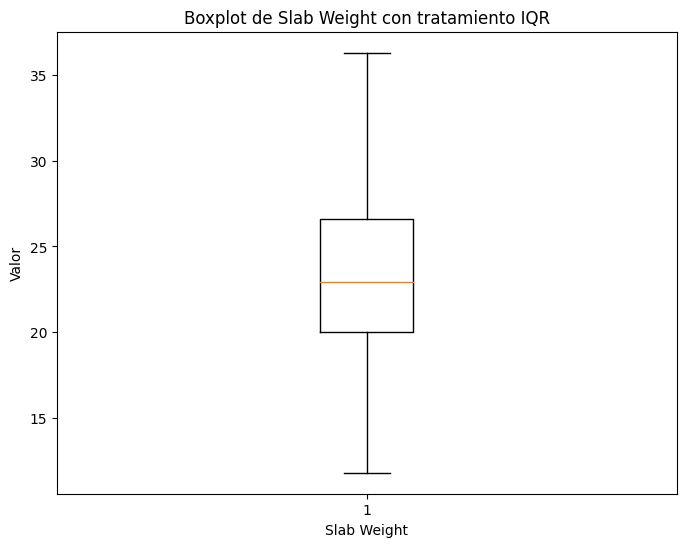

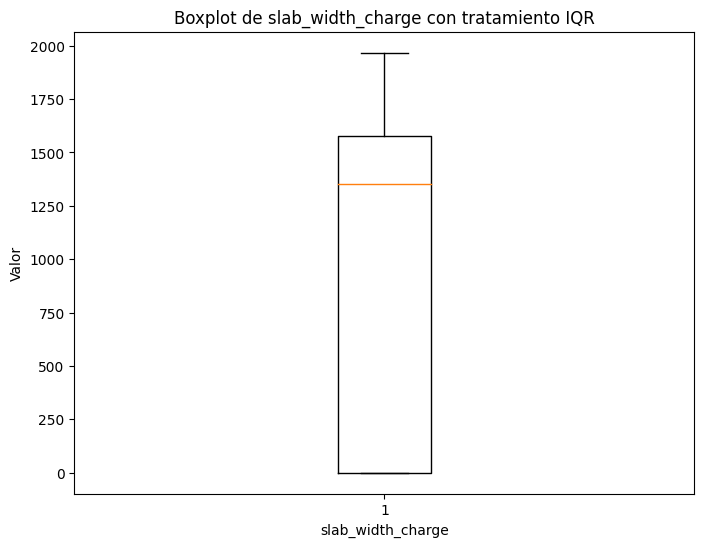

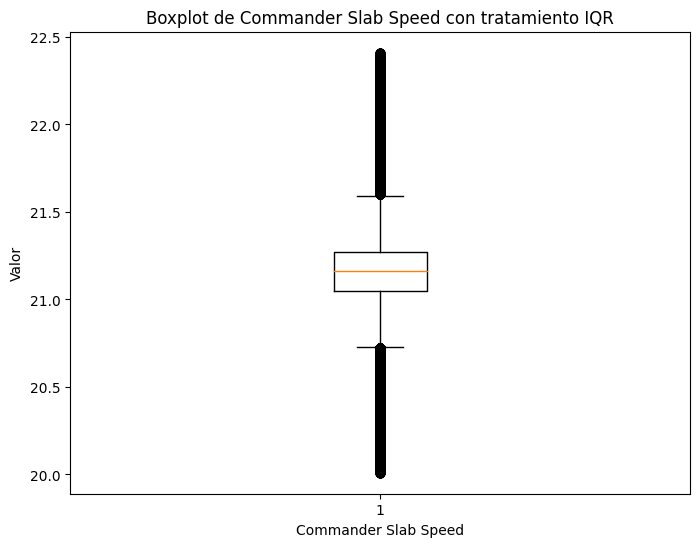

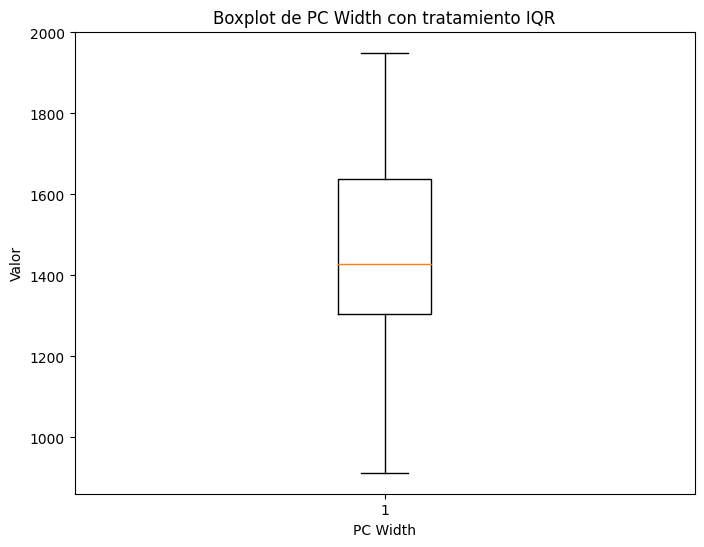

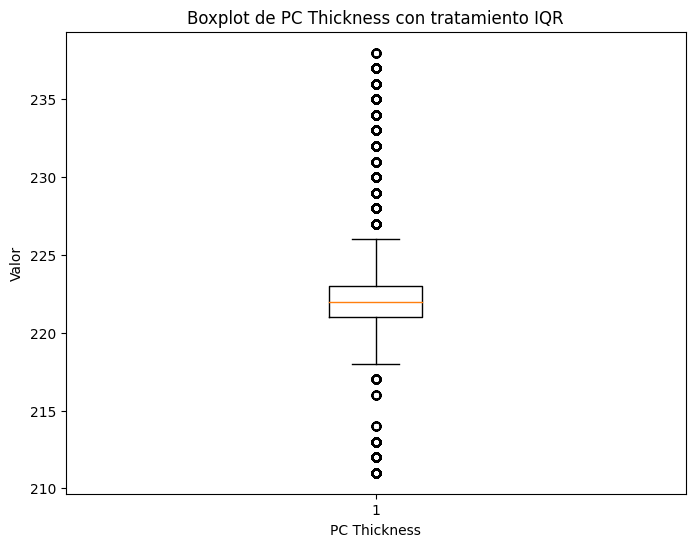

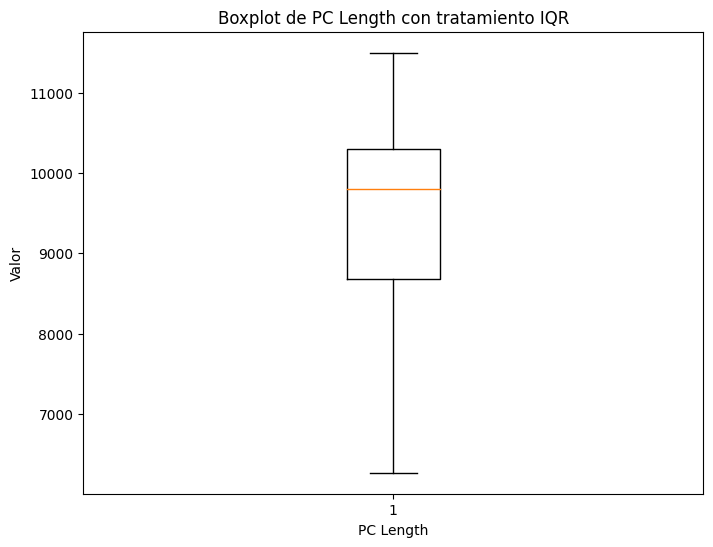

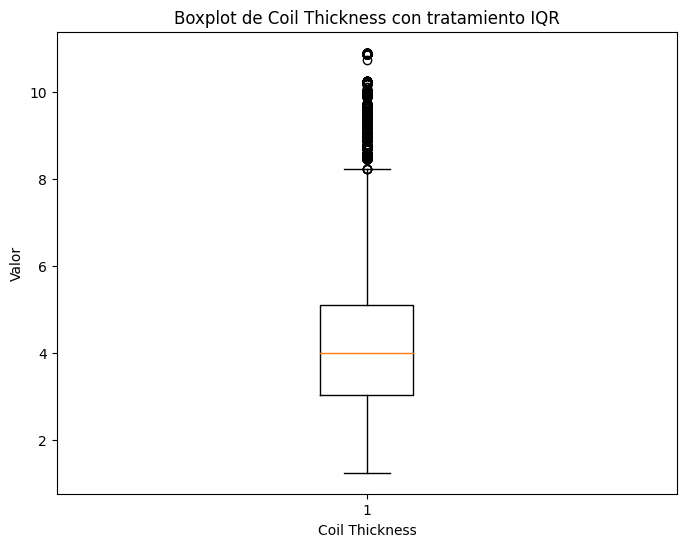

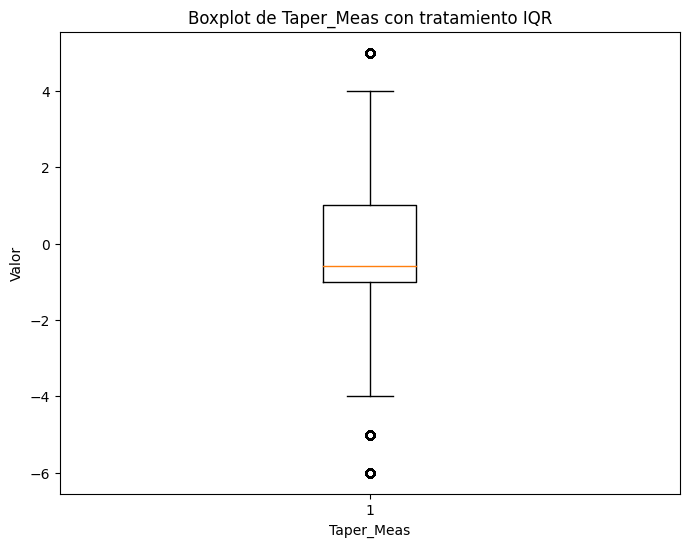

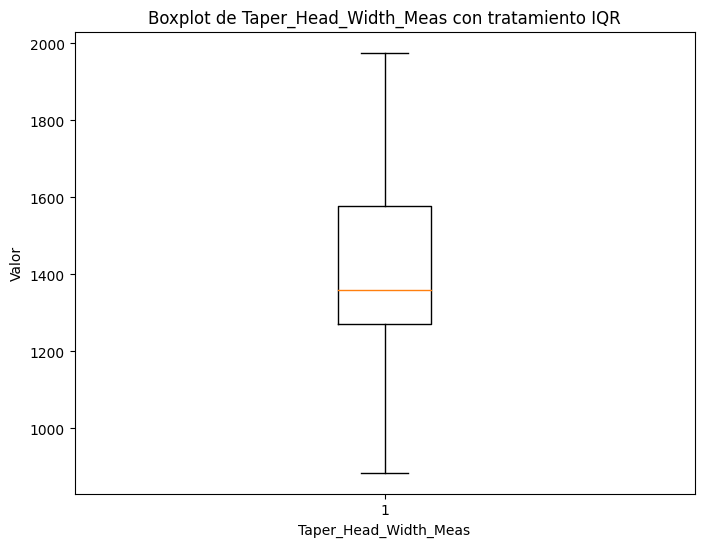

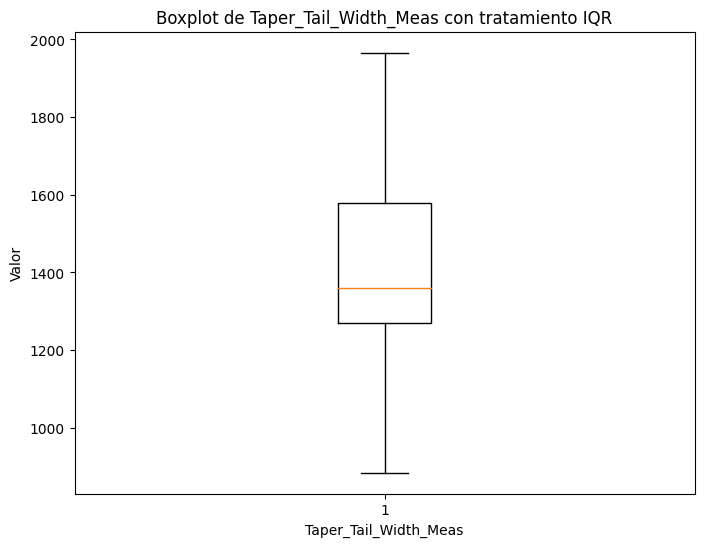

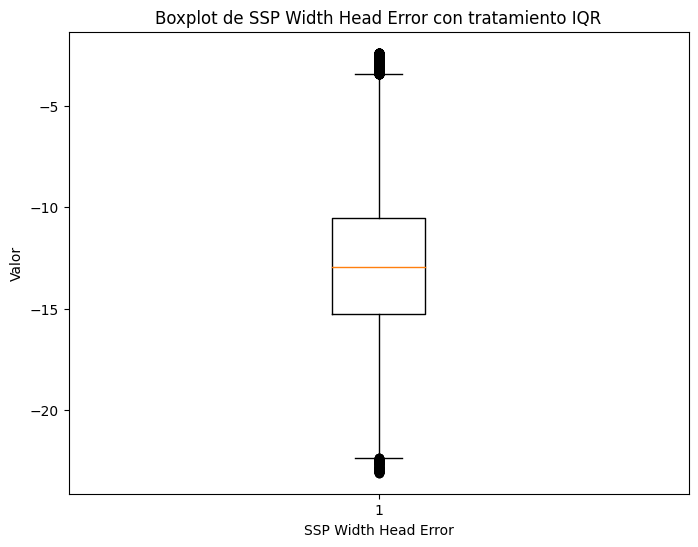

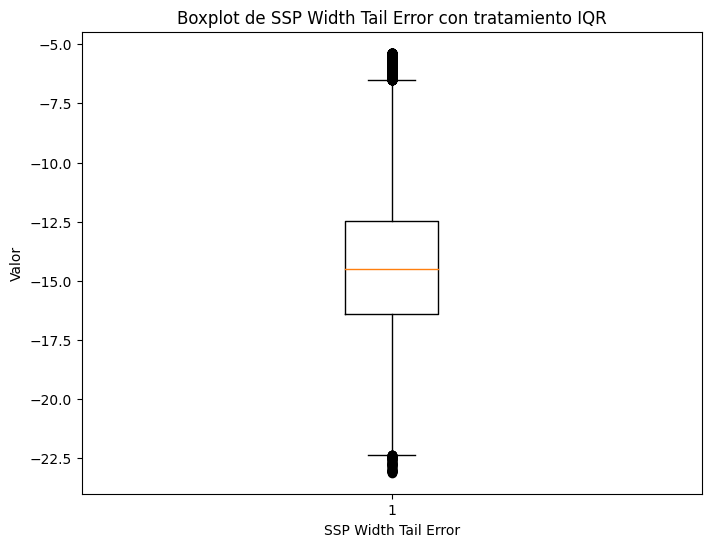

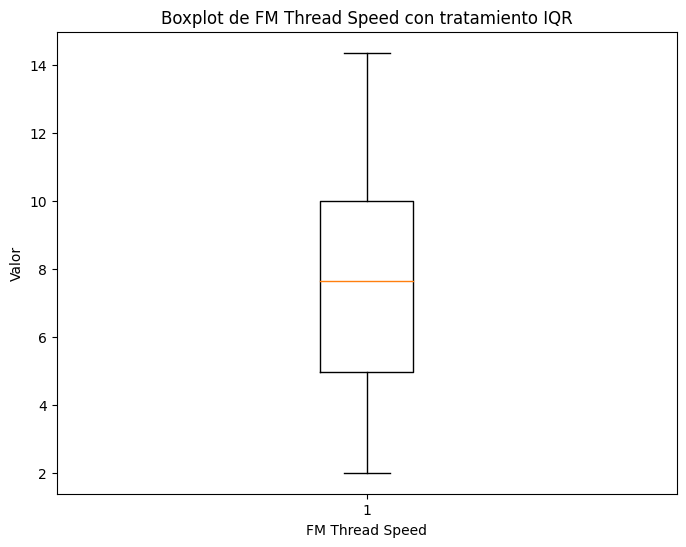

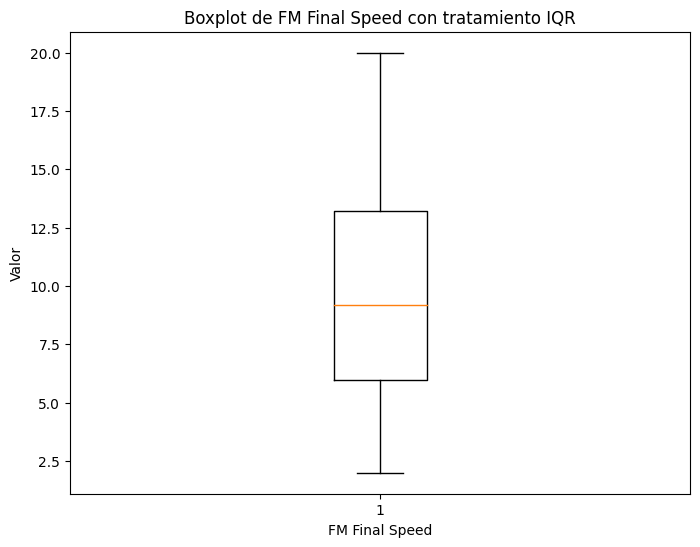

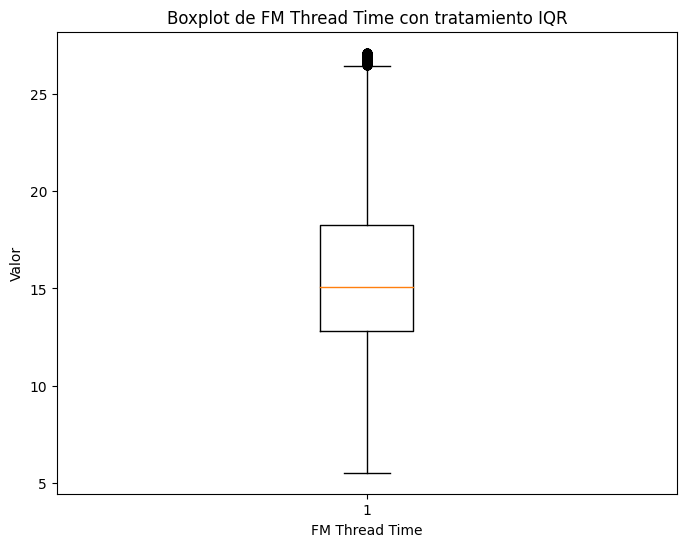

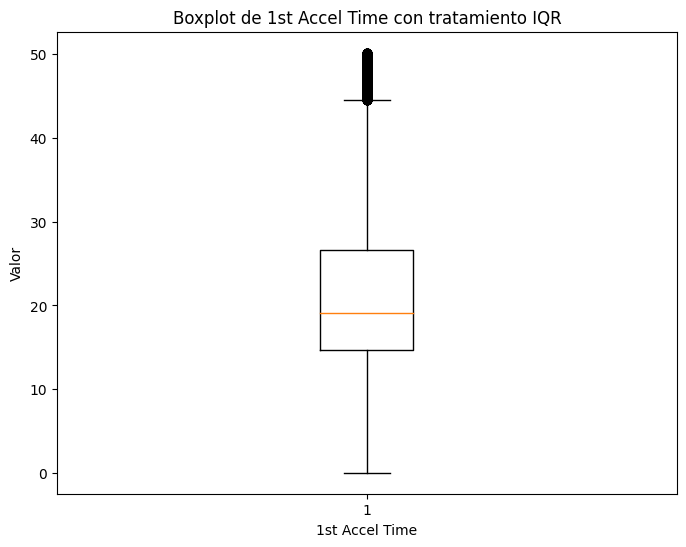

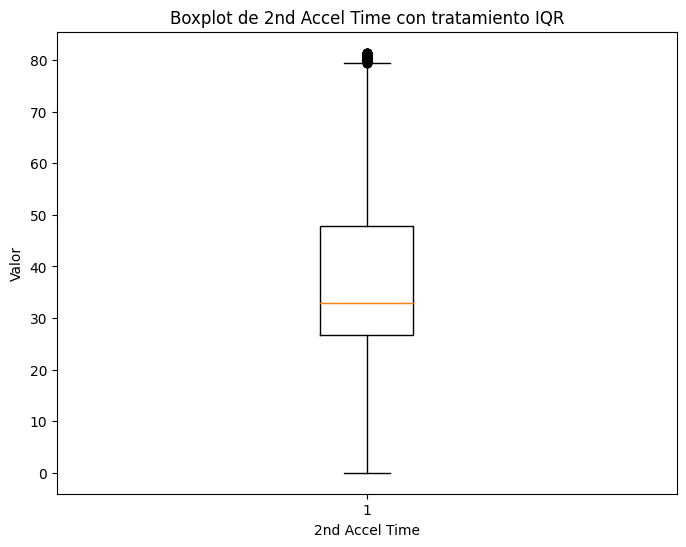

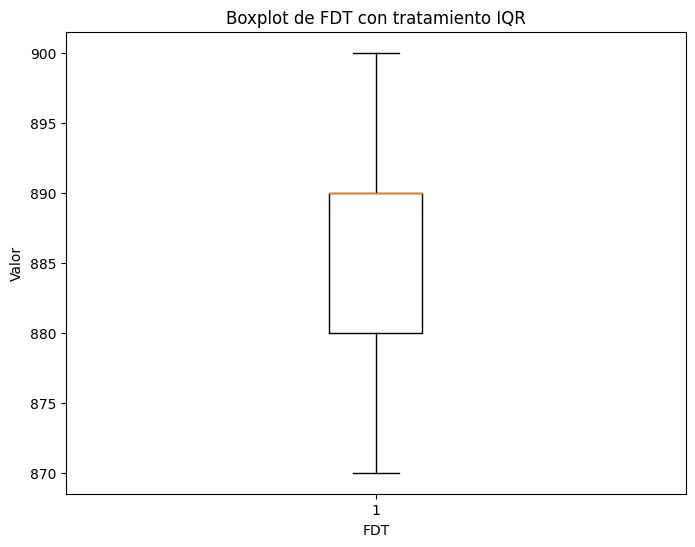

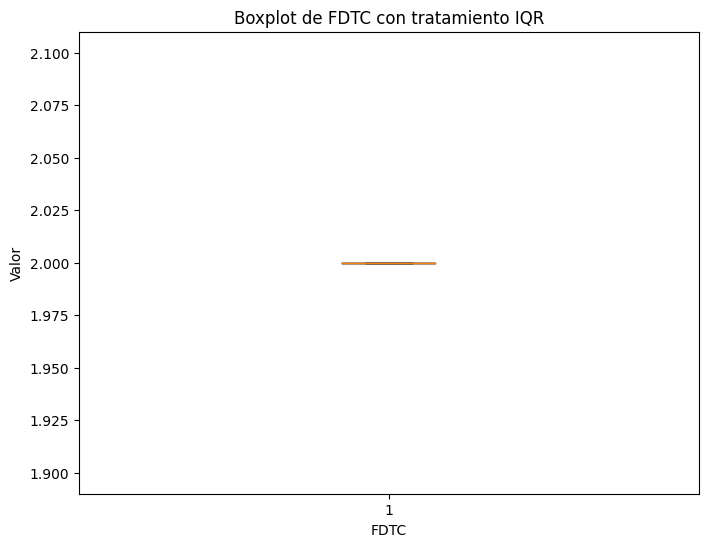

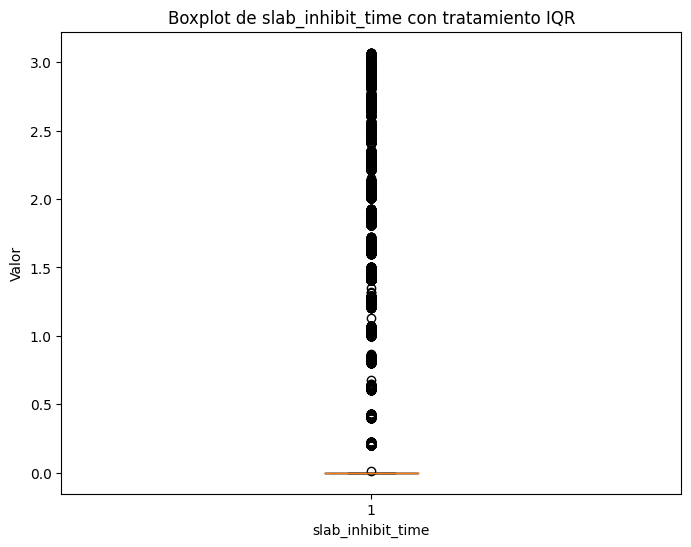

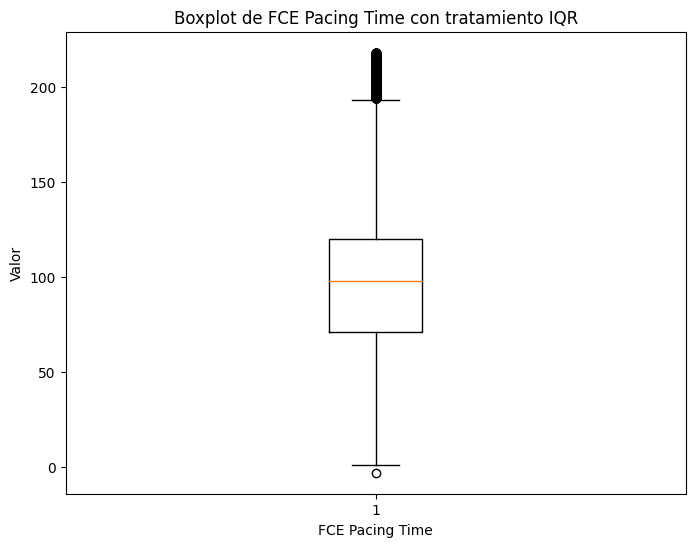

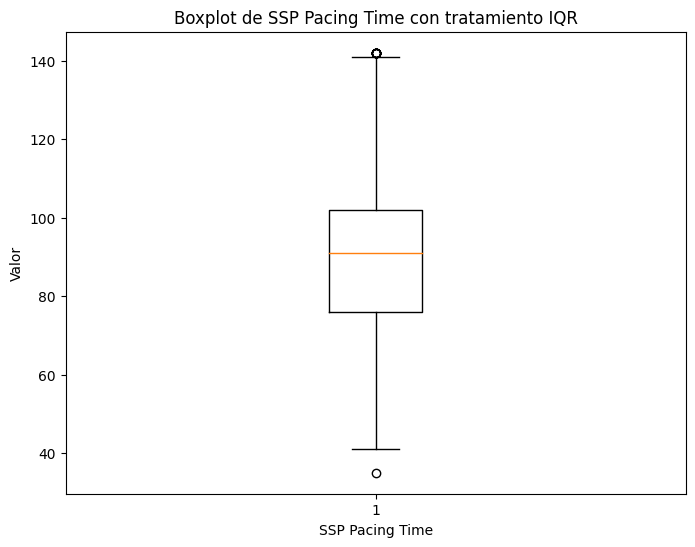

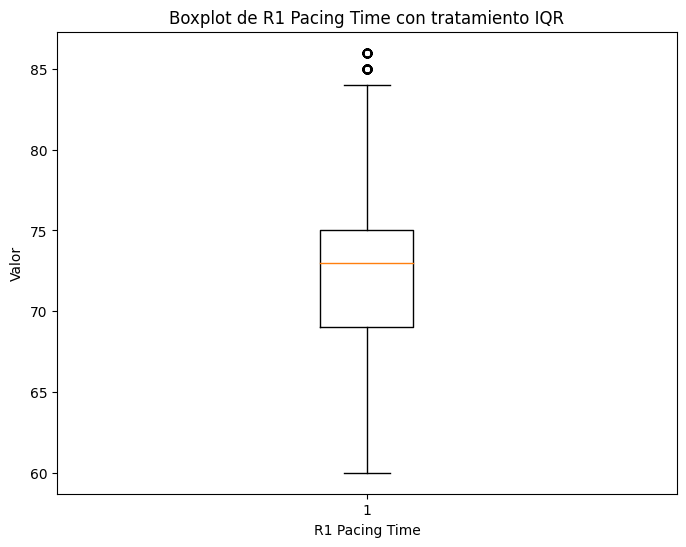

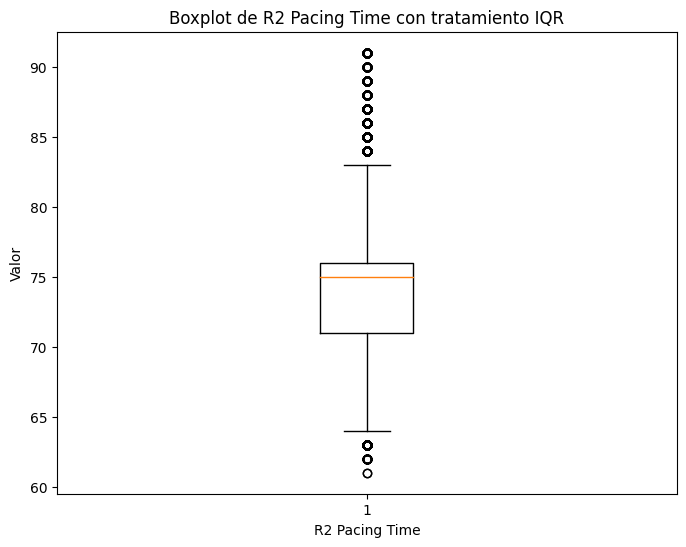

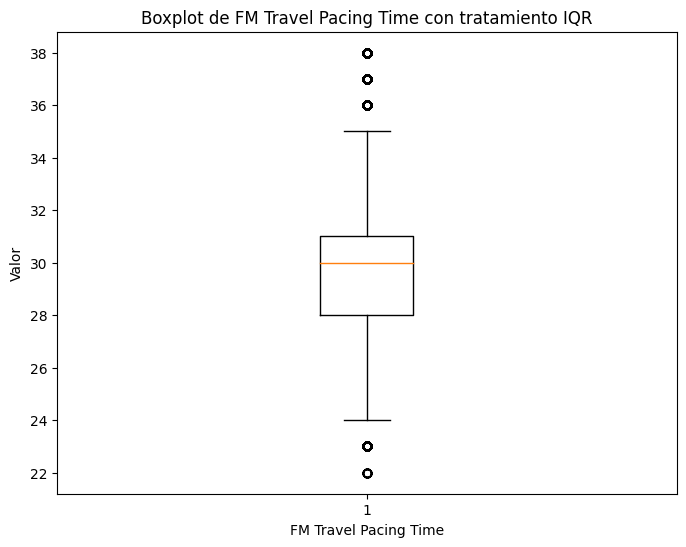

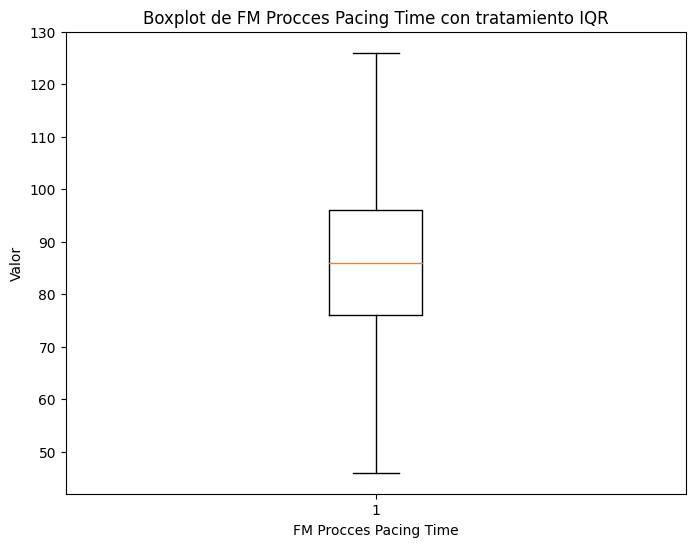

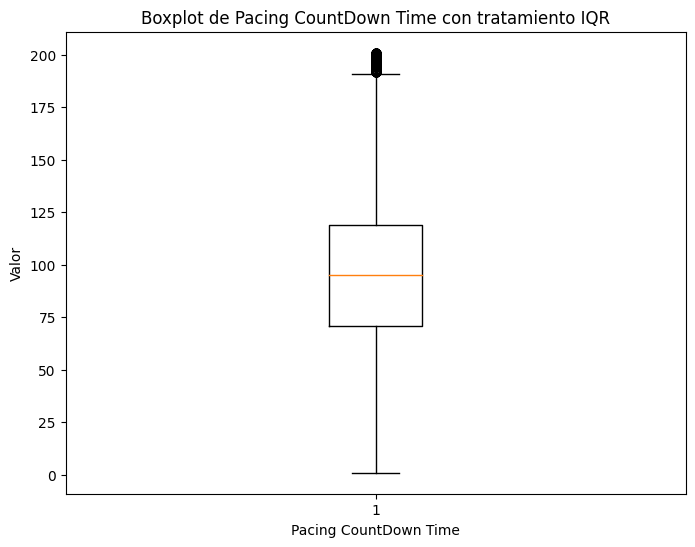

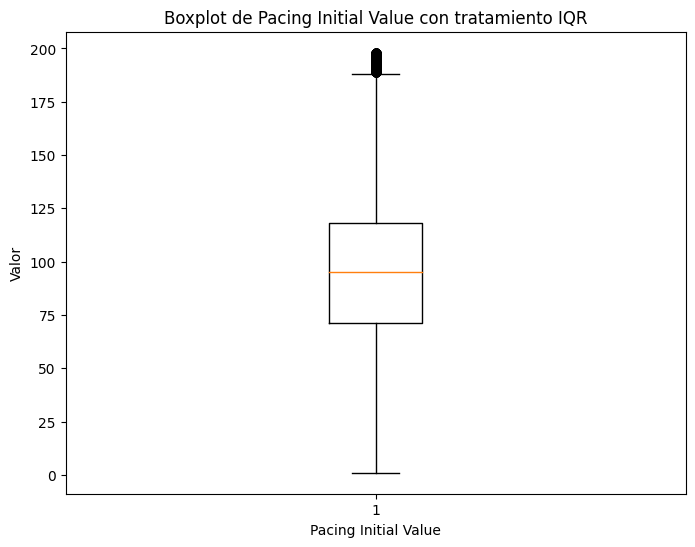

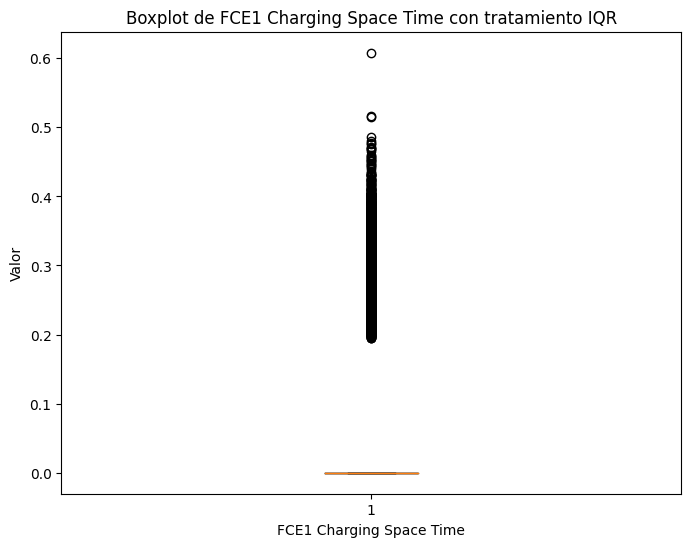

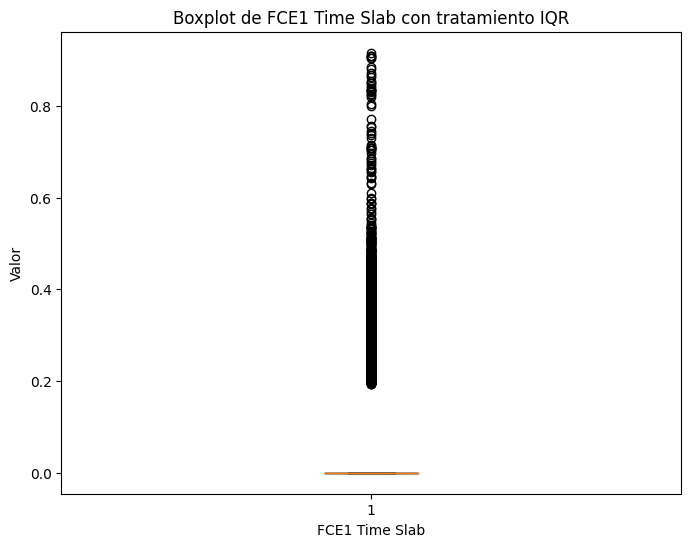

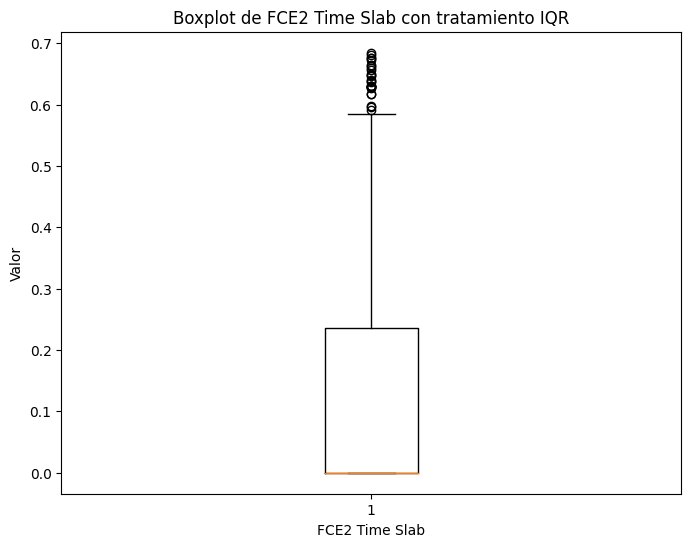

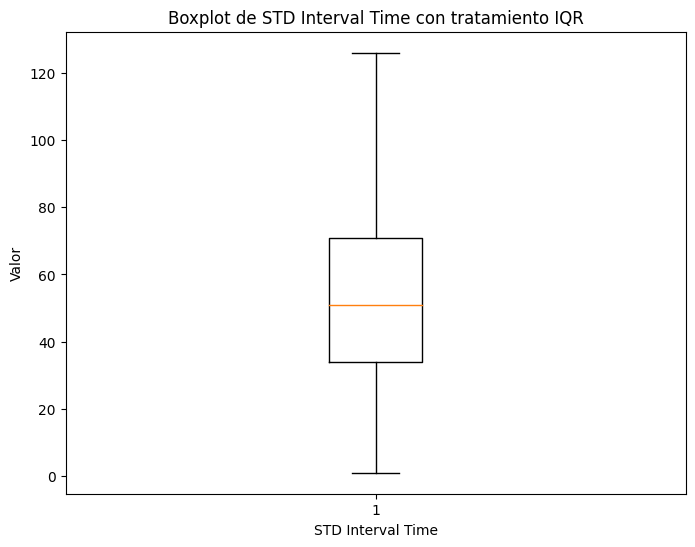

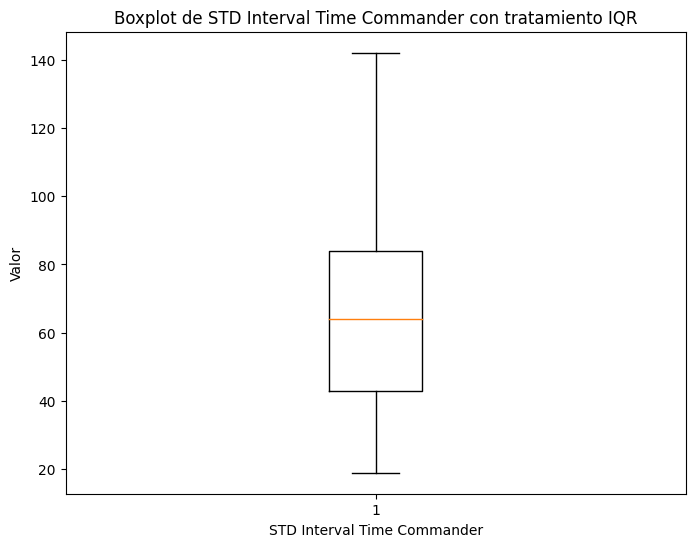

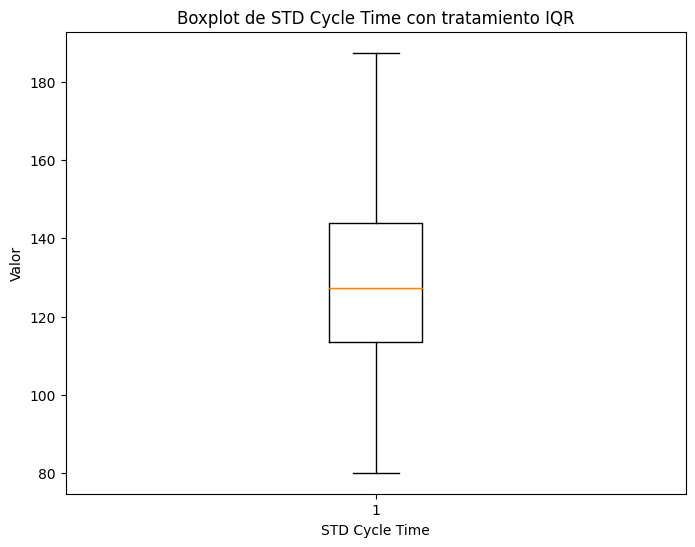

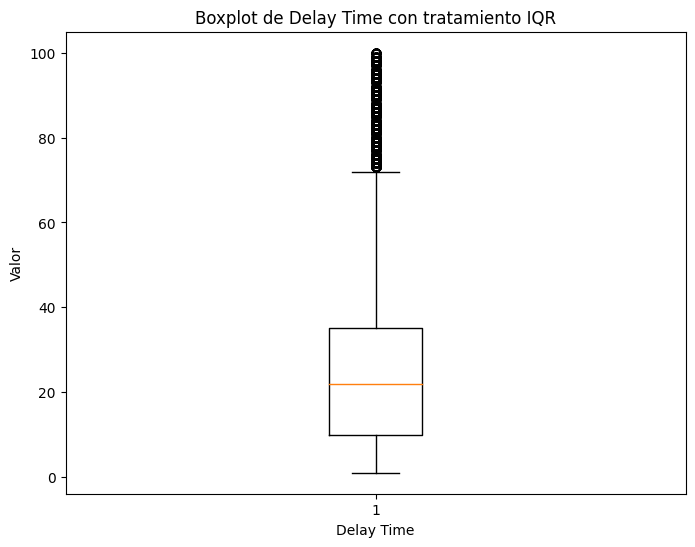

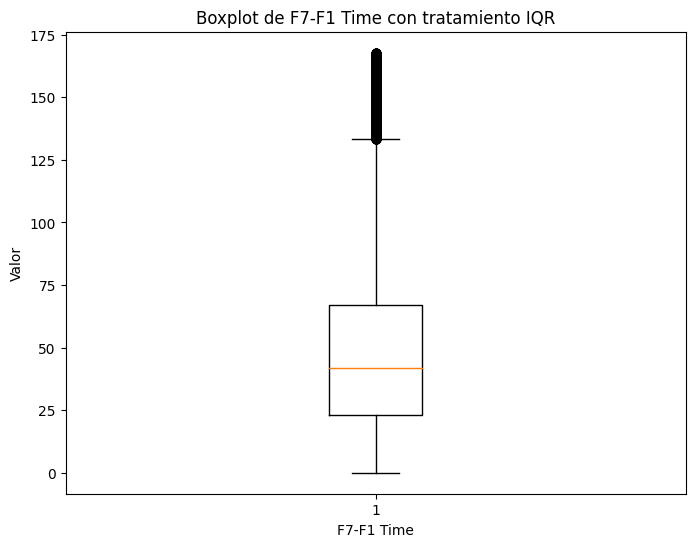

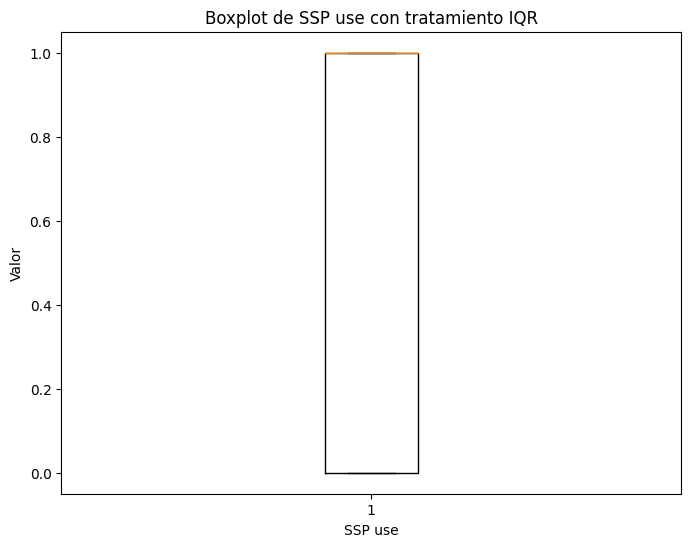

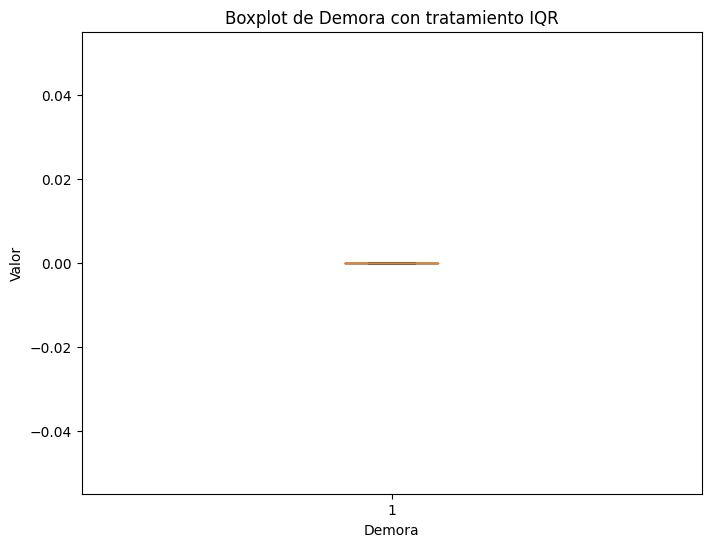

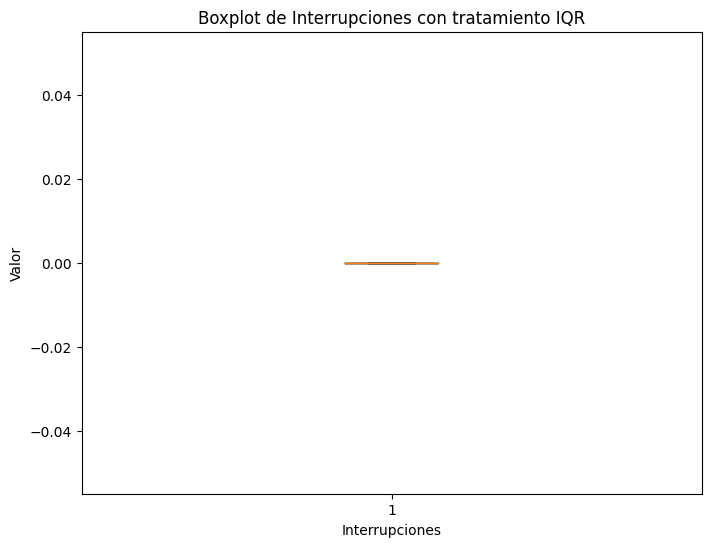

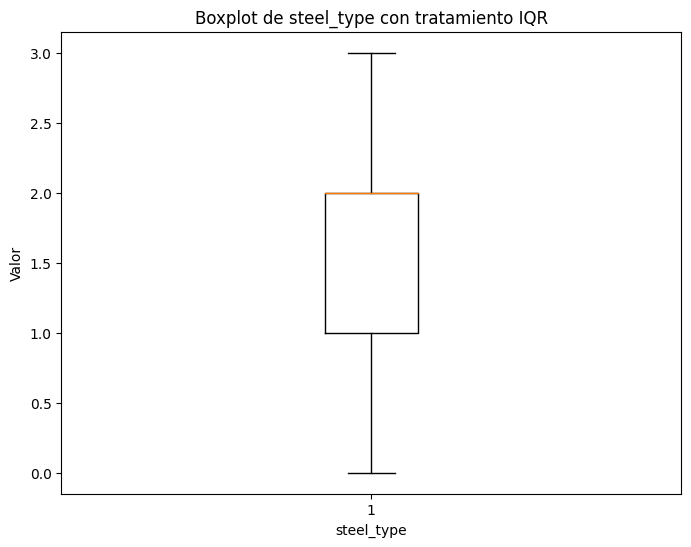

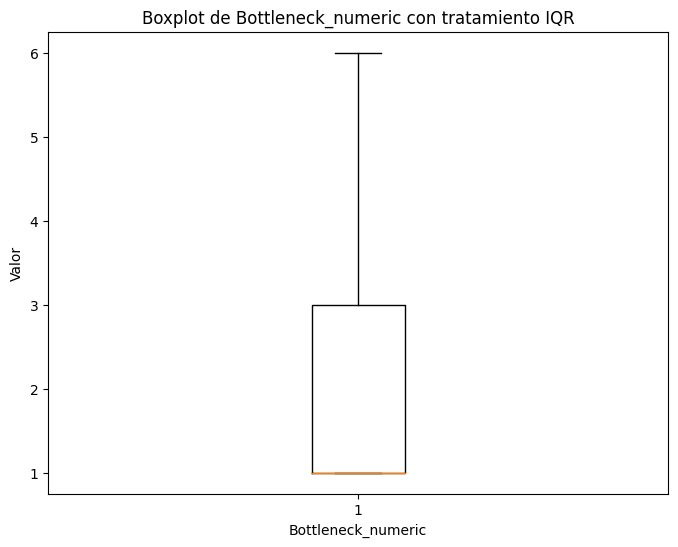

In [ ]:
# prompt:  Grafica los oultiers de IQR_Treated_Mean

import matplotlib.pyplot as plt

# Obtener los outliers de IQR_Treated_Mean
outliers_iqr = data_iqr_treated[(data_iqr_treated < lower_bound) | (data_iqr_treated > upper_bound)]

# Graficar los outliers para cada columna
for column in outliers_iqr.columns:
  plt.figure(figsize=(8, 6))
  plt.boxplot(data_iqr_treated[column])
  plt.title(f"Boxplot de {column} con tratamiento IQR")
  plt.xlabel(column)
  plt.ylabel("Valor")

  # Mostrar valores de los outliers en el gráfico
  outliers_column = outliers_iqr[column][outliers_iqr[column].notnull()]
  if not outliers_column.empty:
    plt.scatter(x=[1] * len(outliers_column), y=outliers_column, color='red', label='Outliers')
    plt.legend()

  plt.show()

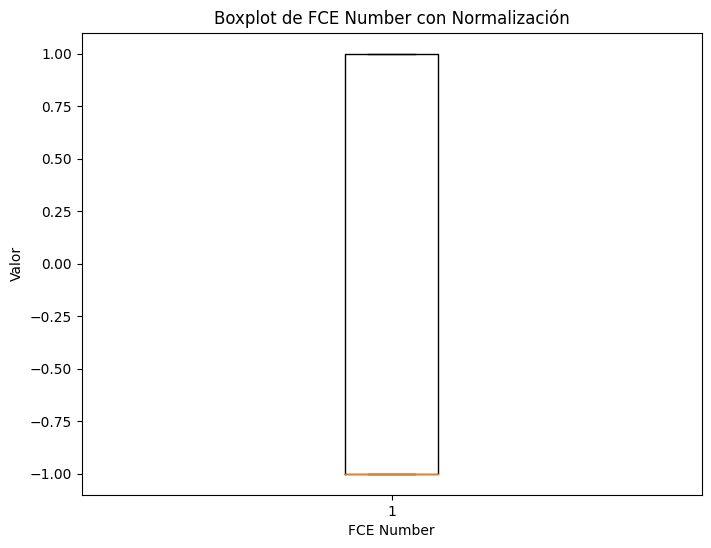

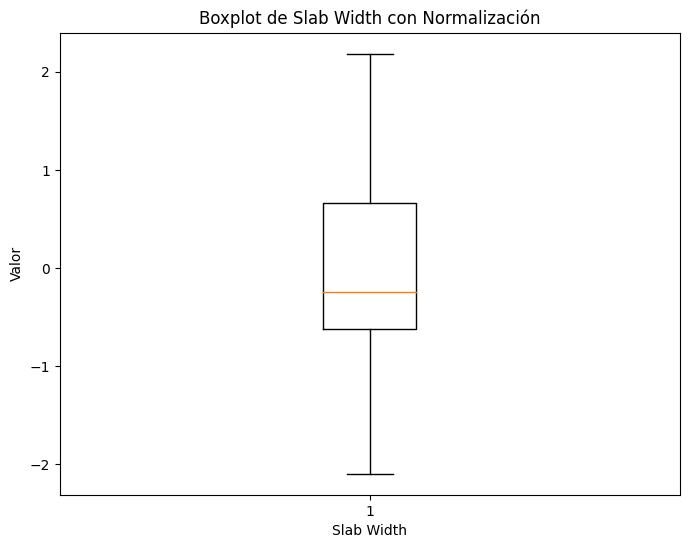

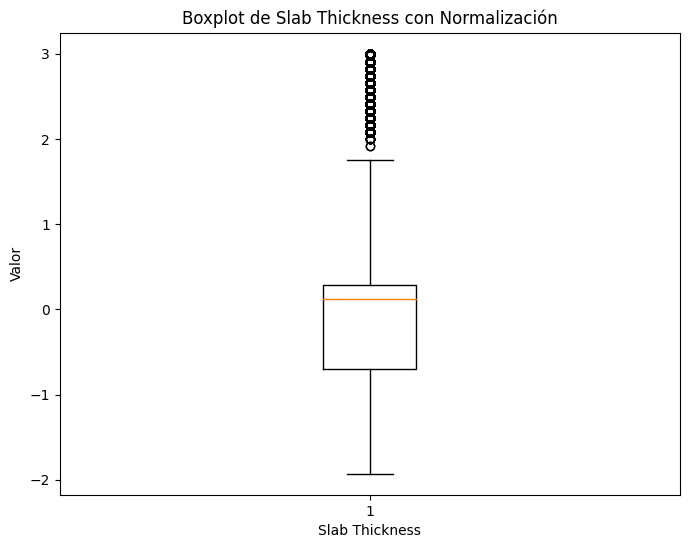

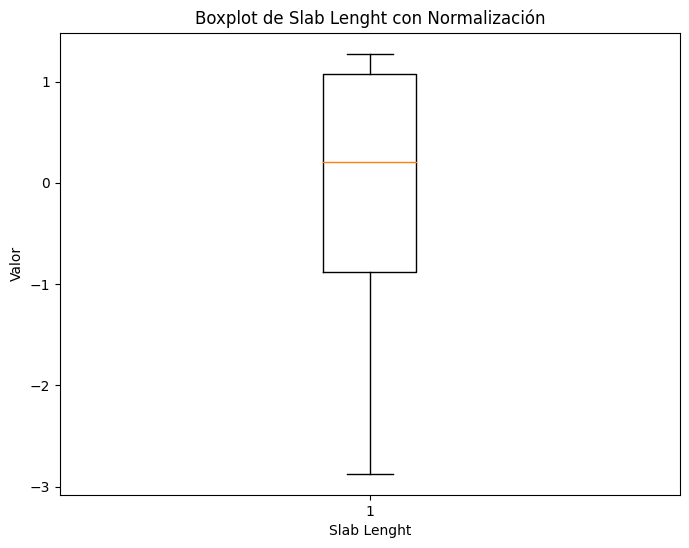

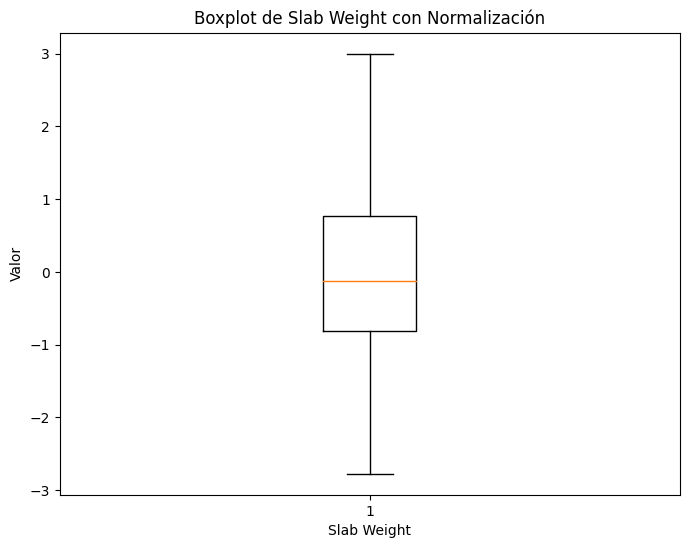

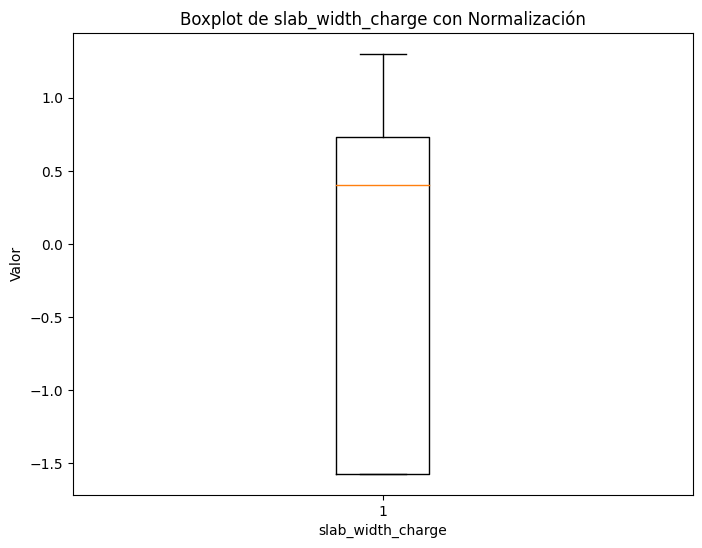

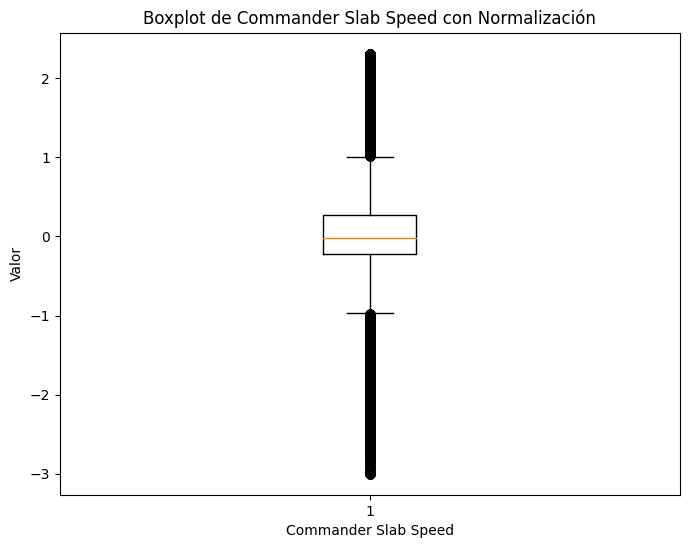

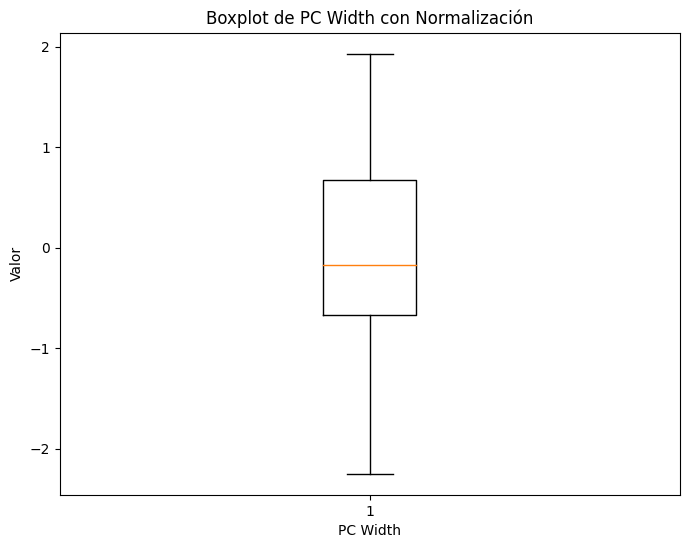

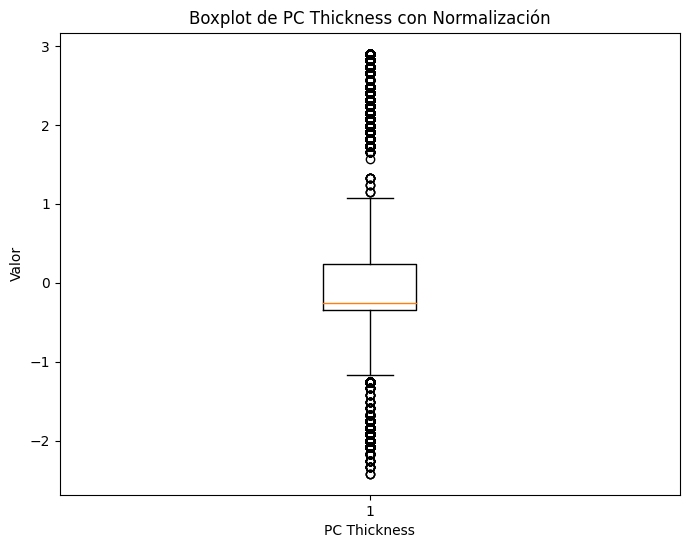

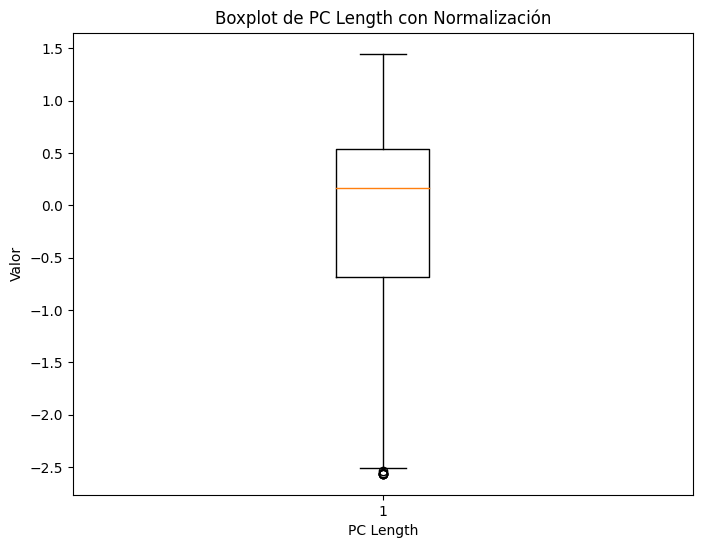

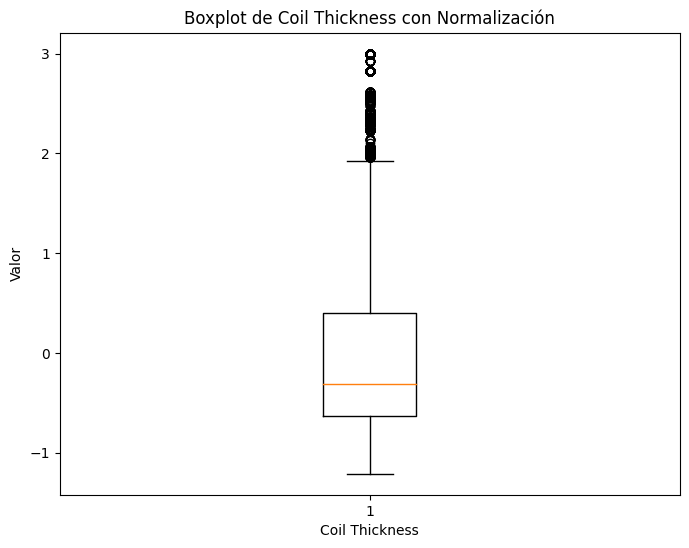

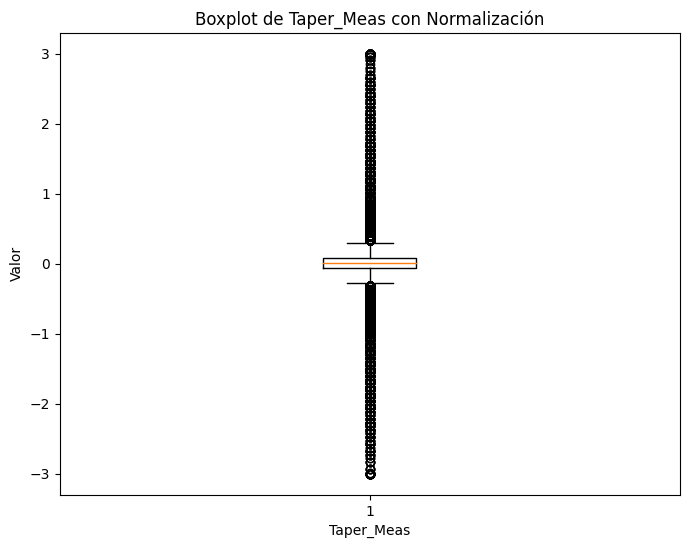

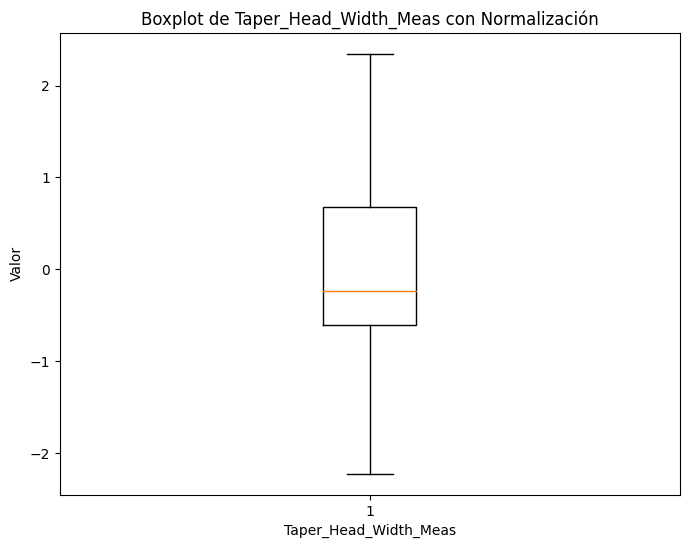

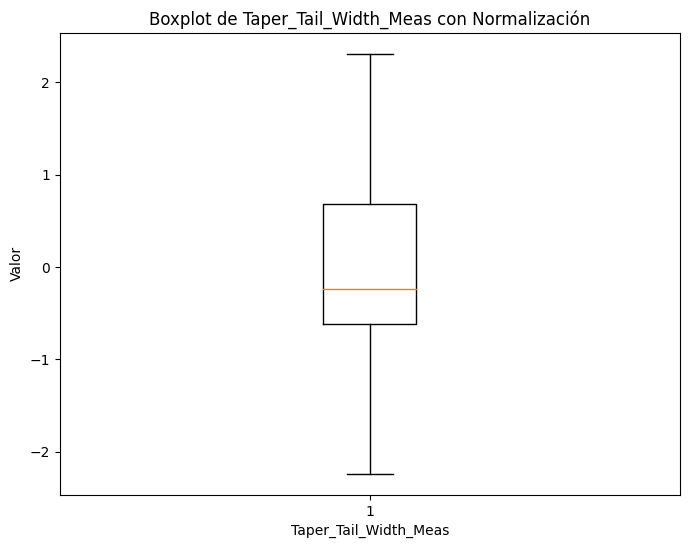

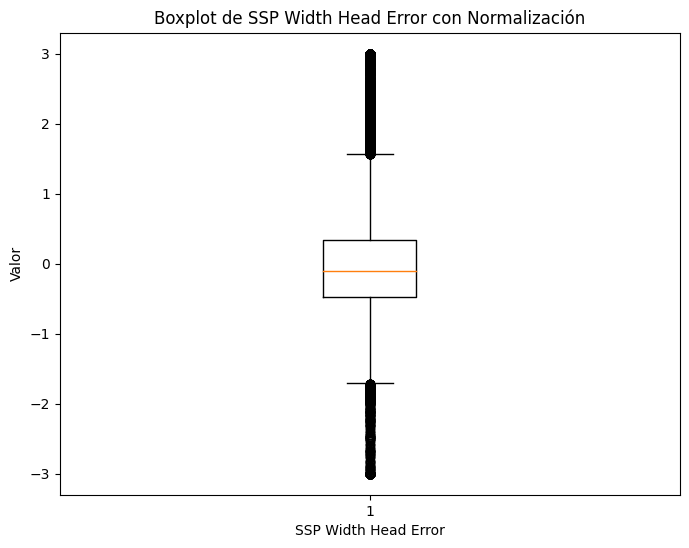

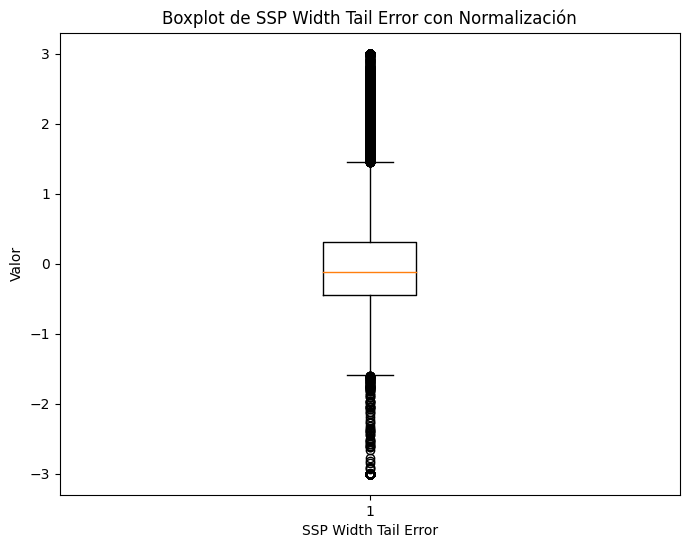

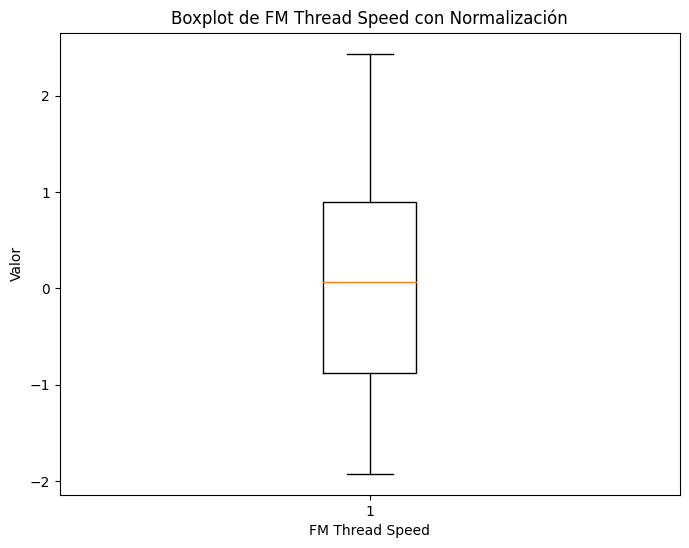

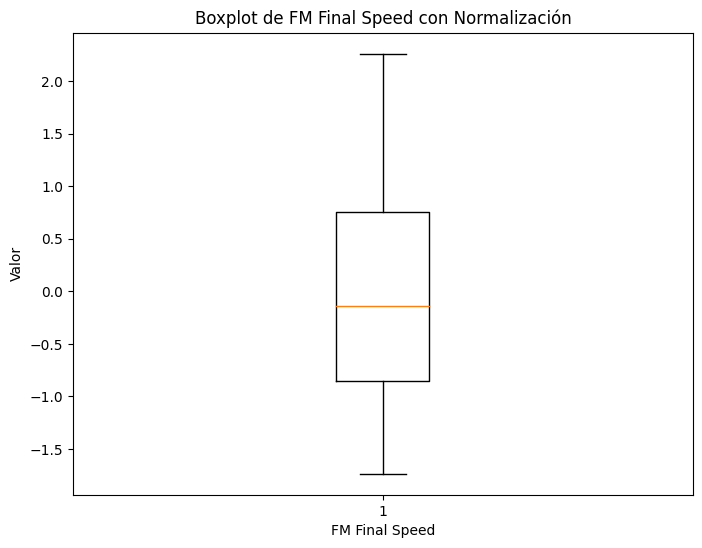

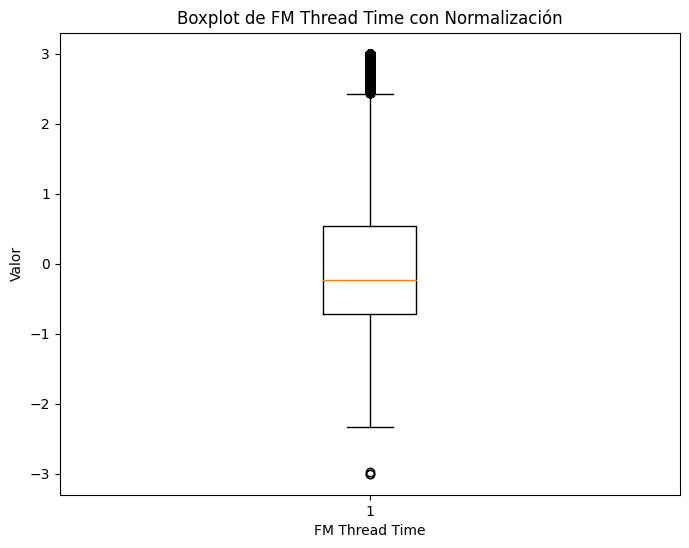

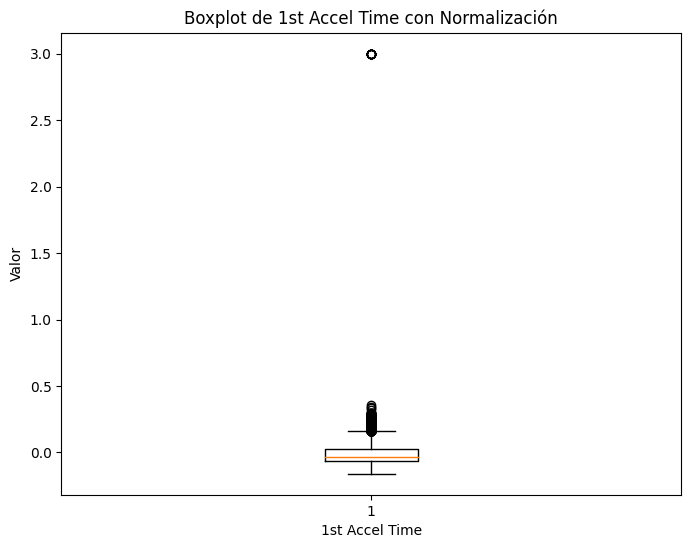

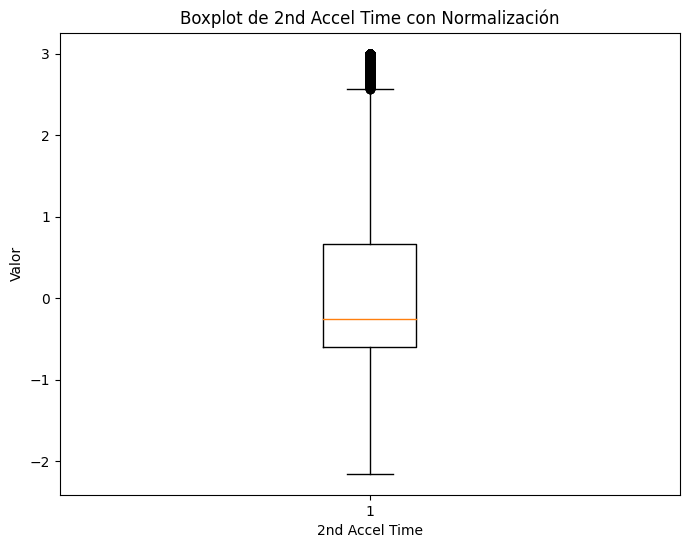

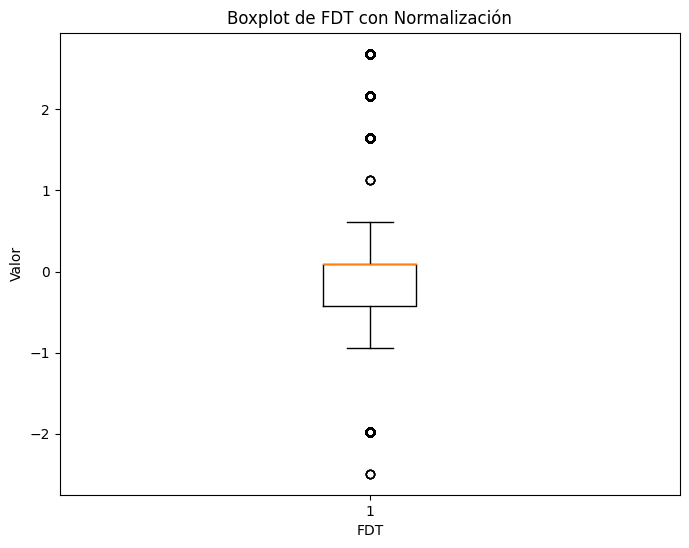

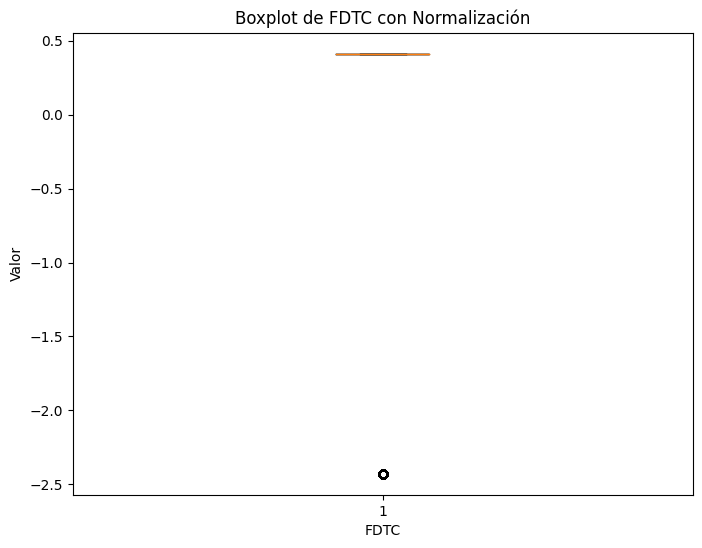

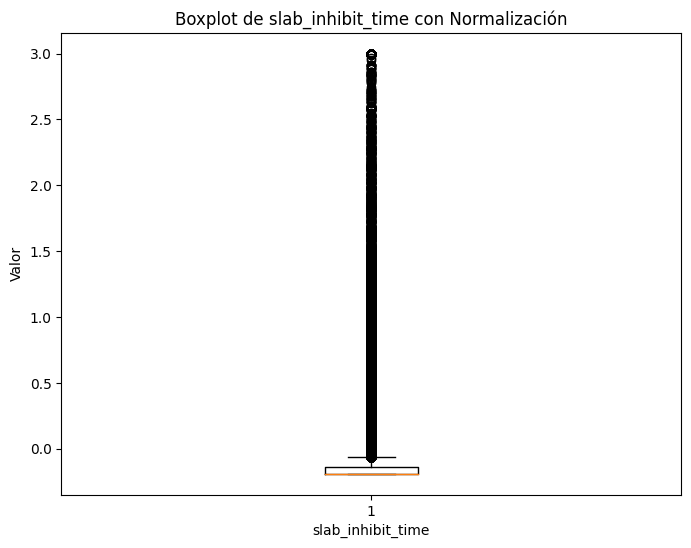

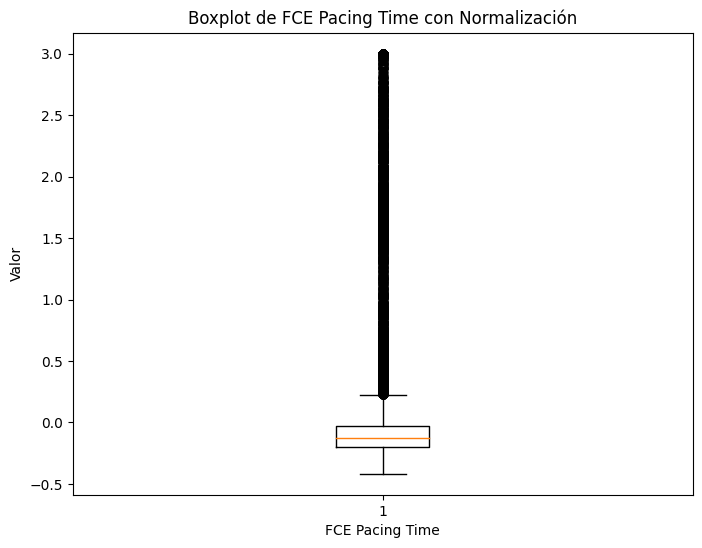

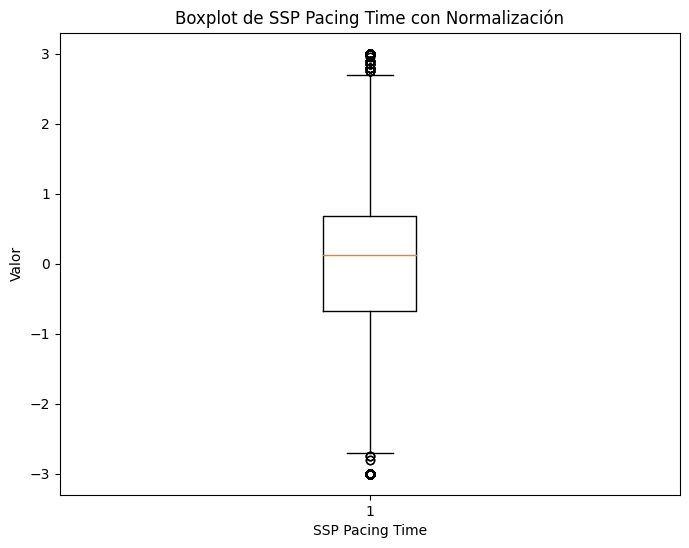

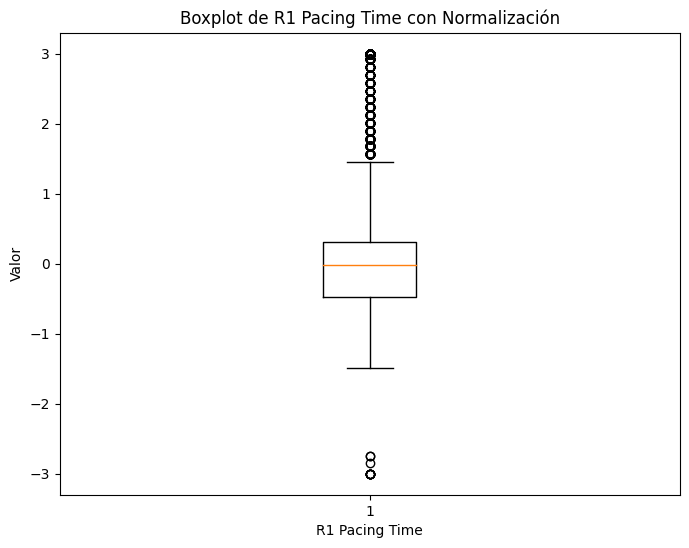

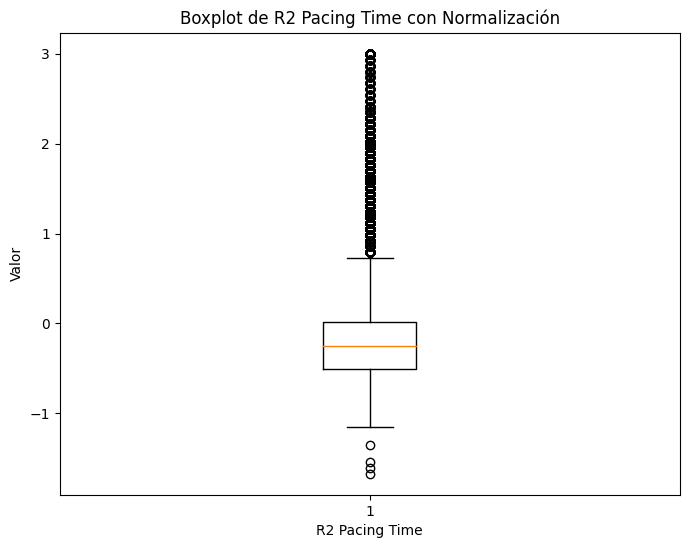

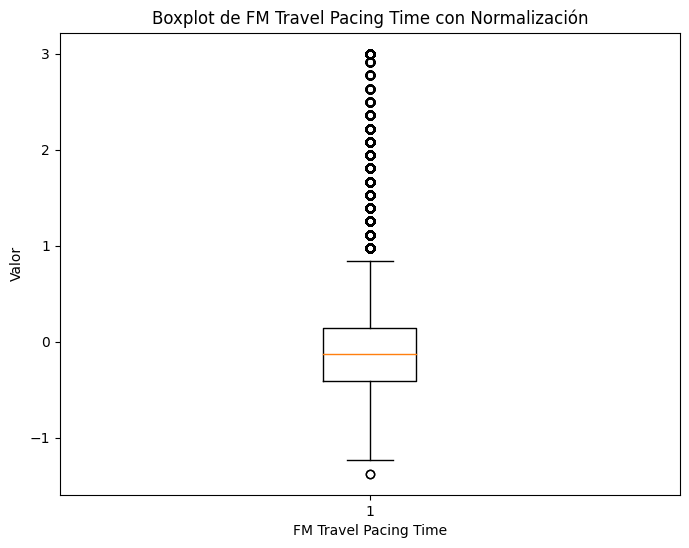

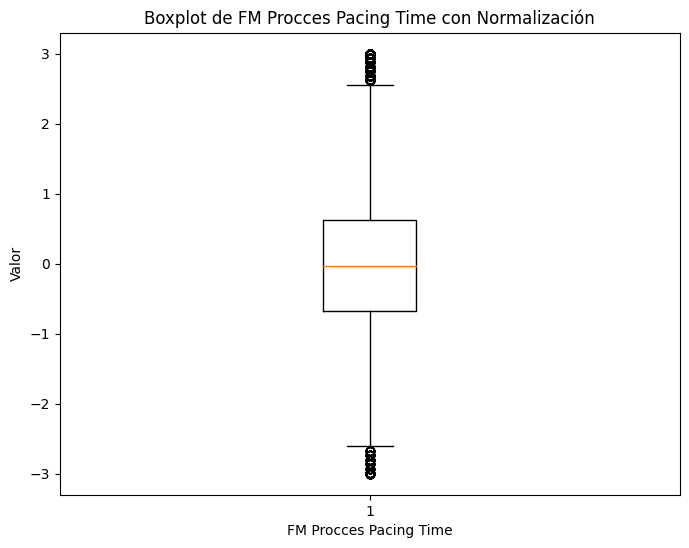

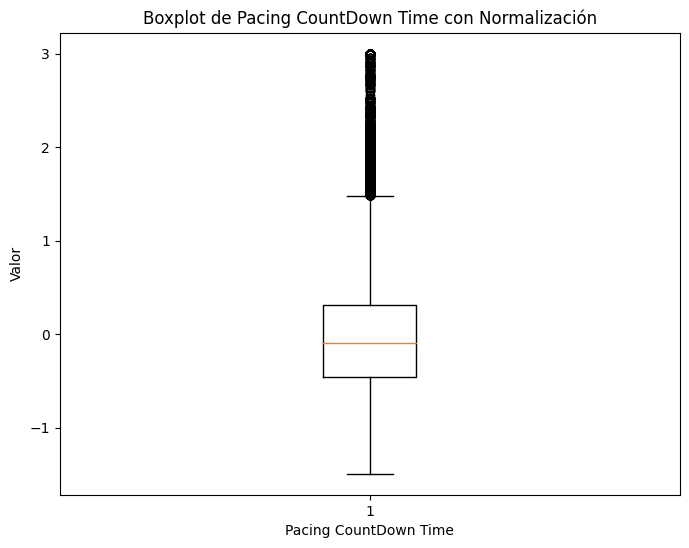

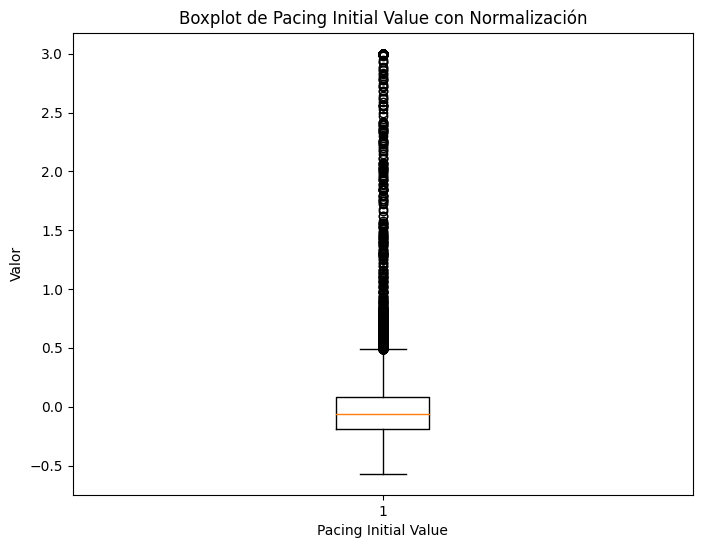

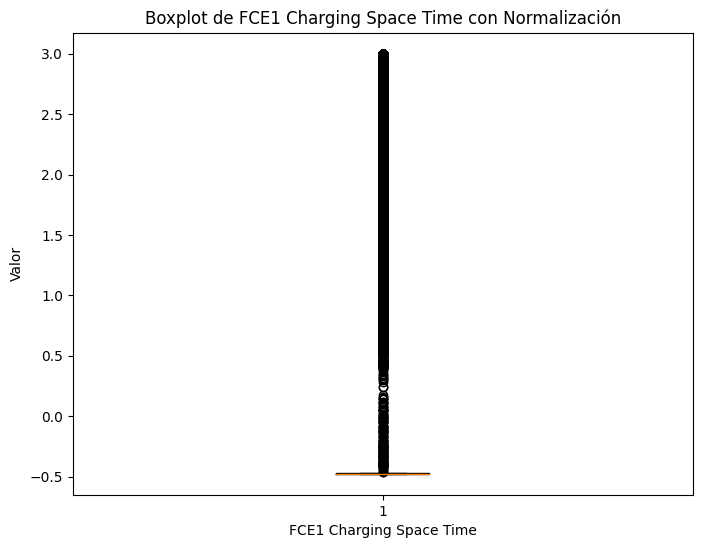

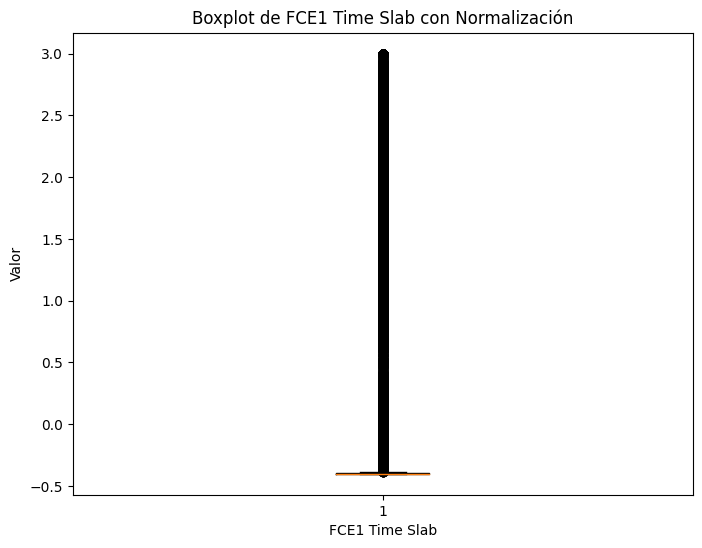

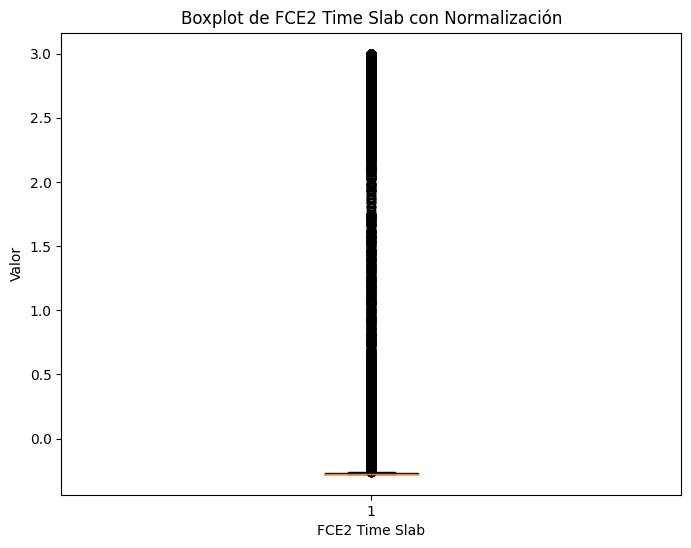

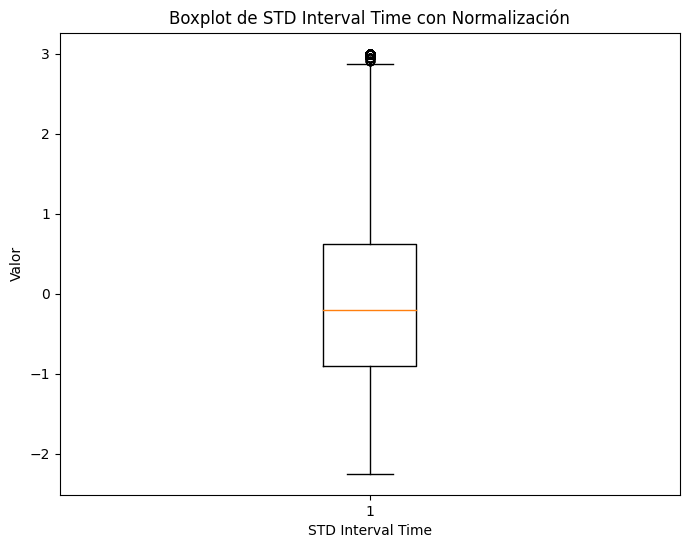

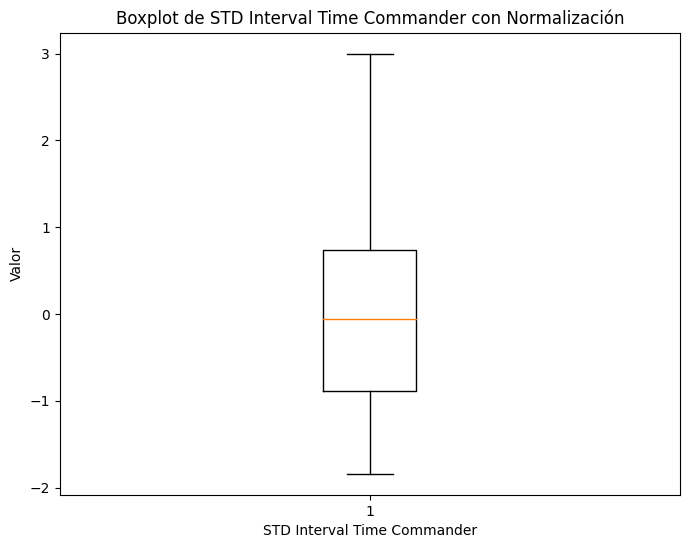

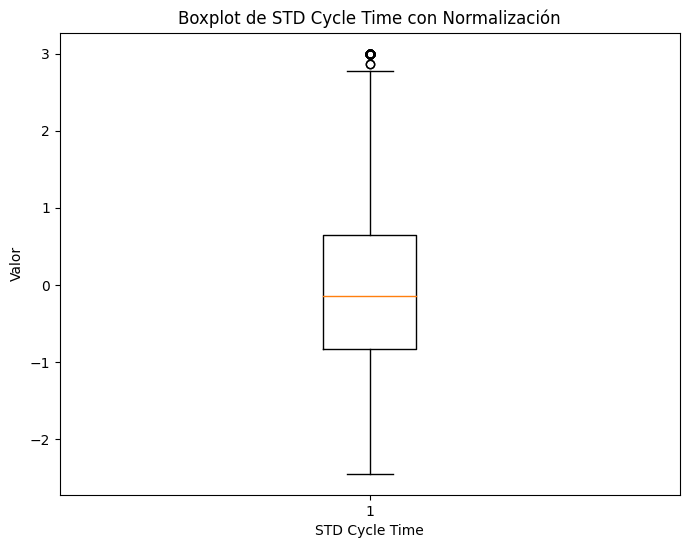

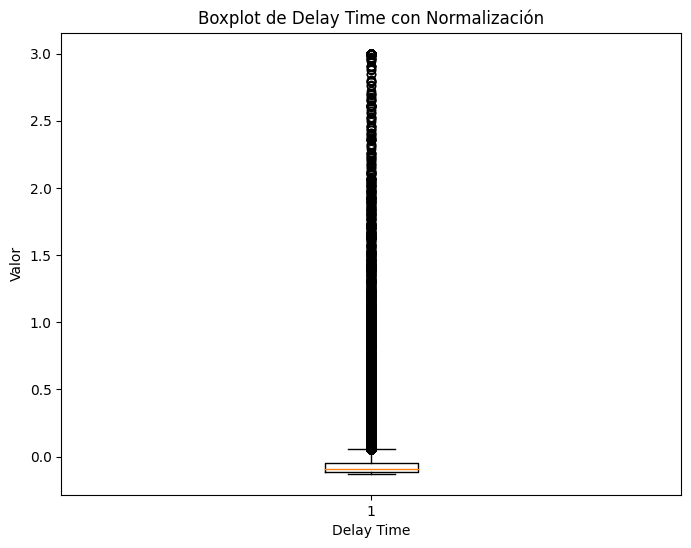

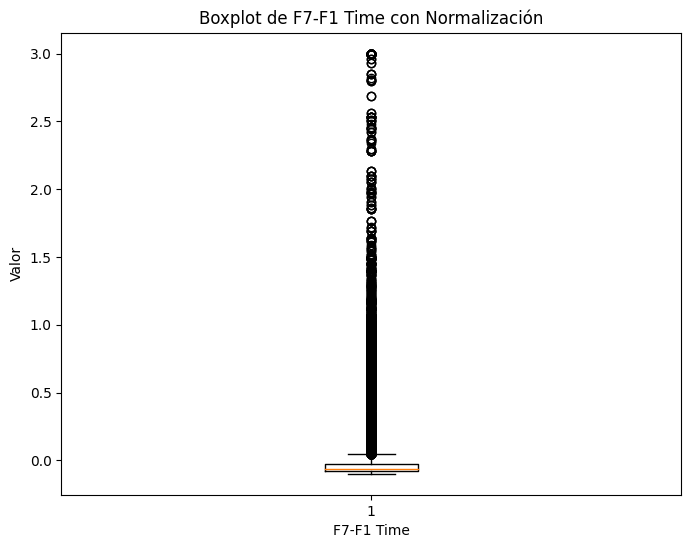

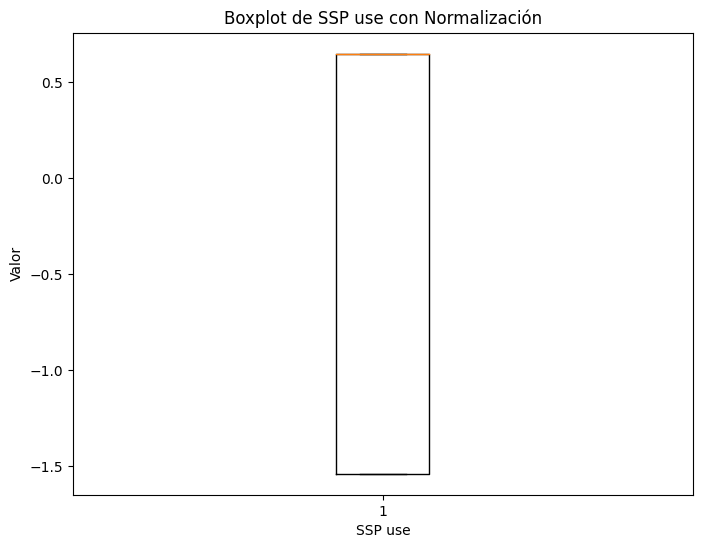

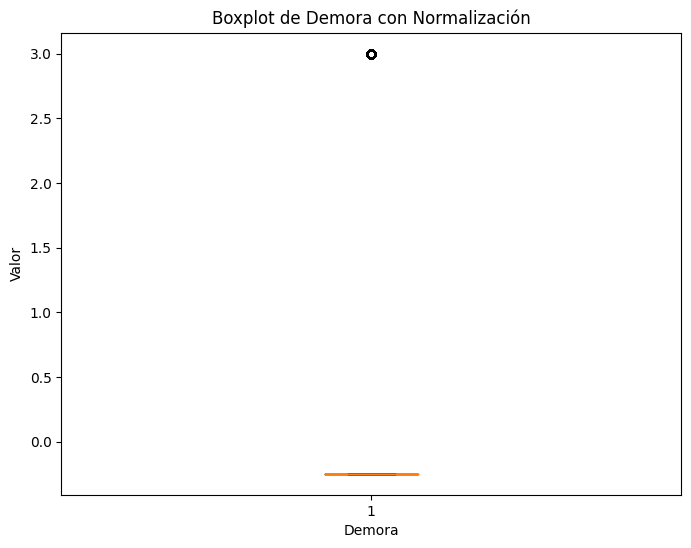

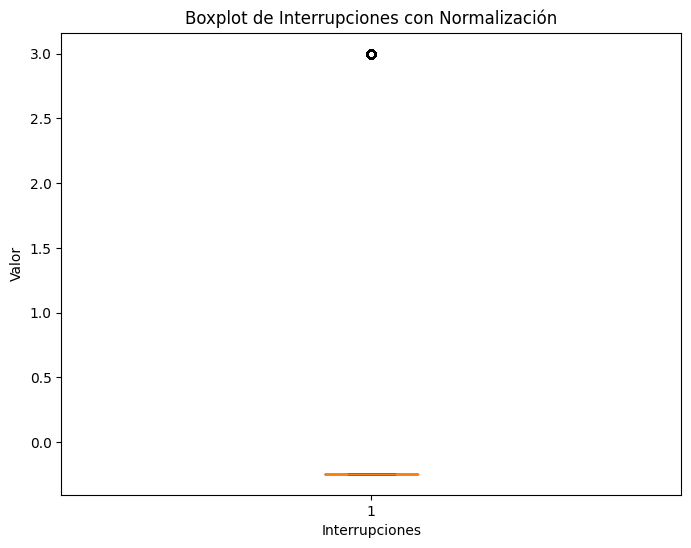

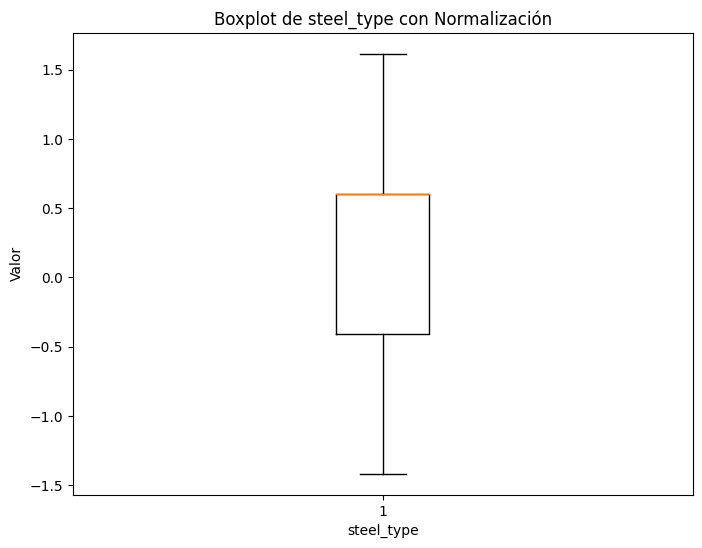

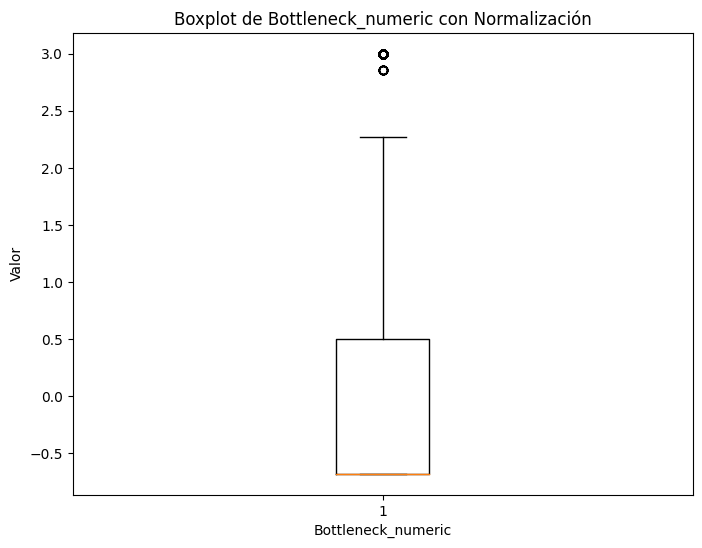

In [ ]:
# Obtener los outliers de Normalized_Mean
outliers_normalized = data_normalized[(data_normalized > 3) | (data_normalized < -3)]

# Graficar los outliers para cada columna
for column in outliers_normalized.columns:
  plt.figure(figsize=(8, 6))
  plt.boxplot(data_normalized[column])
  plt.title(f"Boxplot de {column} con Normalización")
  plt.xlabel(column)
  plt.ylabel("Valor")

  # Mostrar valores de los outliers en el gráfico
  outliers_column = outliers_normalized[column][outliers_normalized[column].notnull()]
  if not outliers_column.empty:
    plt.scatter(x=[1] * len(outliers_column), y=outliers_column, color='red', label='Outliers')
    plt.legend()

  plt.show()

In [ ]:
# Seleccionar solo las columnas numéricas excepto 'interrupciones'
data_numeric = data.select_dtypes(include='number').drop(columns=['Interrupciones', 'Demora', 'FCE Number', 'FDTC', 'SSP use', 'steel_type', 'Bottleneck_numeric'])

# Calcular el IQR y los límites
Q1 = data_numeric.quantile(0.25)
Q3 = data_numeric.quantile(0.75)
IQR = Q3 - Q1

# Límites superior e inferior para detectar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Reemplazar los outliers con NaN en las columnas seleccionadas
data[data_numeric.columns] = data_numeric.mask((data_numeric < lower_bound) | (data_numeric > upper_bound))

# Opcional: Rellenar los NaN resultantes con la mediana de cada columna
data.fillna(data_numeric.median(), inplace=True)

In [ ]:
data.head()

,FCE Number,Slab Width,Slab Thickness,Slab Lenght,Slab Weight,slab_width_charge,Commander Slab Speed,PC Width,PC Thickness,PC Length,...,STD Interval Time,STD Interval Time Commander,STD Cycle Time,Delay Time,F7-F1 Time,SSP use,Demora,Interrupciones,steel_type,Bottleneck_numeric
0,2,1580,235.0,7262,20.36,1581.0,21.16,1151.0,222.0,8707.0,...,88.0,47.0,143.8,45.0,25.21,1.0,0,0,1,3
1,1,1579,235.0,7277,20.45,0.0,22.17,1152.0,224.0,11481.0,...,88.0,29.0,143.8,19.0,88.02,1.0,0,0,1,1
2,2,1579,222.0,8705,23.13,0.0,21.93,1151.0,222.0,8707.0,...,92.0,47.0,143.8,31.0,38.09,1.0,0,0,0,1
3,1,1564,235.0,9593,26.89,0.0,21.96,1152.0,224.0,11481.0,...,85.0,29.0,143.8,12.0,50.15,0.0,0,0,1,3
4,2,1562,235.0,8431,23.50,0.0,21.88,1151.0,222.0,8707.0,...,74.0,47.0,143.8,40.0,98.61,0.0,0,0,1,8


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Calcular la matriz de correlación
correlation_matrix = data.corr()

# Extraer las correlaciones de la variable 'Interrupciones'
interrupciones_correlations = correlation_matrix['Interrupciones']

# Ordenar las correlaciones de mayor a menor
interrupciones_correlations_sorted = interrupciones_correlations.sort_values(ascending=False)

# Mostrar las correlaciones ordenadas
print(interrupciones_correlations_sorted)


Interrupciones                 1.000000
Demora                         0.982578
Bottleneck_numeric             0.118699
FCE Pacing Time                0.087519
Pacing Initial Value           0.077379
Commander Slab Speed           0.077147
Pacing CountDown Time          0.076669
slab_width_charge              0.067680
FCE1 Time Slab                 0.057572
FM Thread Time                 0.046241
FM Travel Pacing Time          0.032504
F7-F1 Time                     0.029752
FDT                            0.029420
Slab Width                     0.024454
FCE2 Time Slab                 0.024325
Taper_Head_Width_Meas          0.024260
Taper_Tail_Width_Meas          0.024156
steel_type                     0.017925
1st Accel Time                 0.017035
SSP Width Head Error           0.016914
SSP Width Tail Error           0.011223
Slab Weight                    0.010243
FCE Number                     0.009766
SSP use                        0.008599
SSP Pacing Time                0.006979


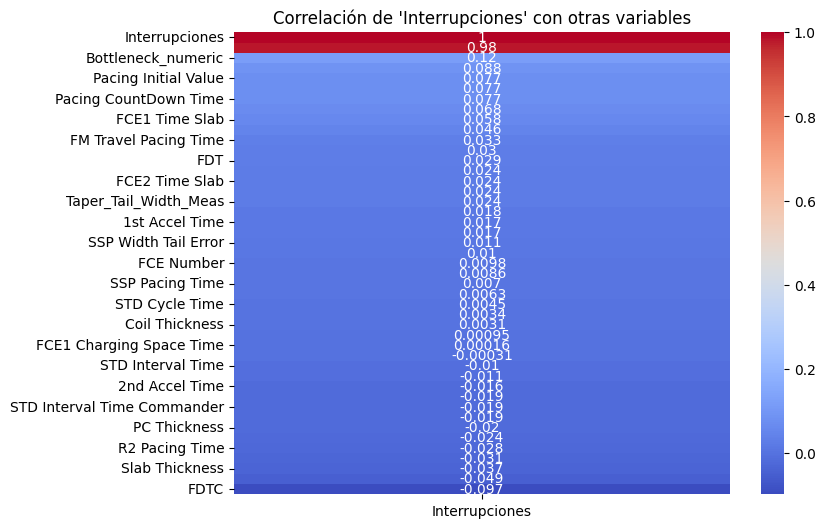

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Suponiendo que ya has calculado 'correlation_matrix'
# Seleccionar solo las correlaciones de 'Interrupciones' y ordenarlas de mayor a menor
correlation_with_interrupciones = correlation_matrix['Interrupciones'].sort_values(ascending=False)

# Configurar el tamaño del gráfico
plt.figure(figsize=(8, 6))

# Crear un heatmap para mostrar la correlación de 'Interrupciones' con el resto de las variables
sns.heatmap(correlation_with_interrupciones.to_frame(), annot=True, cmap='coolwarm', cbar=True)

# Títulos y etiquetas
plt.title("Correlación de 'Interrupciones' con otras variables")
plt.show()

In [ ]:
# value counts de interrupciones
data['Interrupciones'].value_counts()

,count
Interrupciones,
0,53420
1,3175


Construye gráficas que permitan analizar dependencias causales entre las variables.



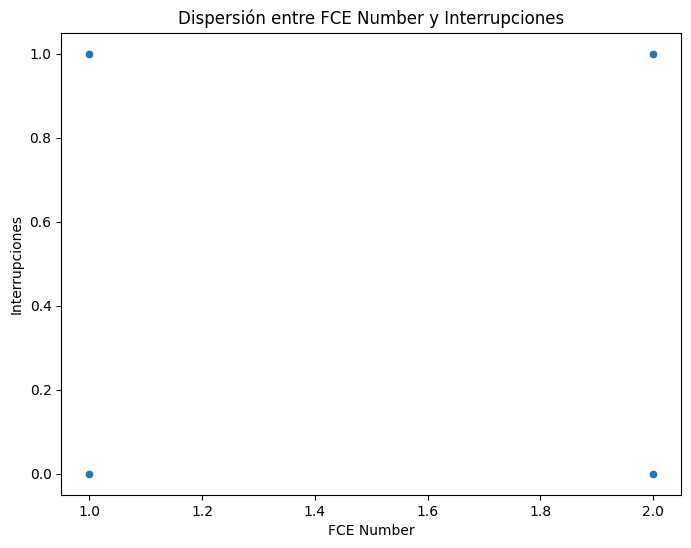

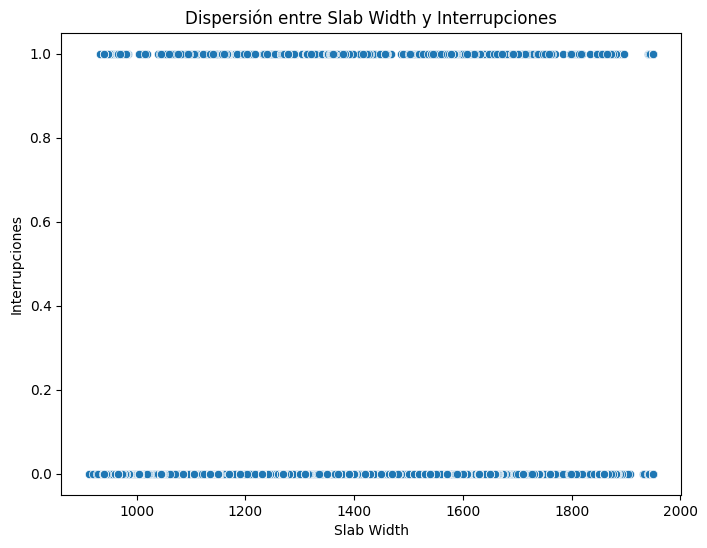

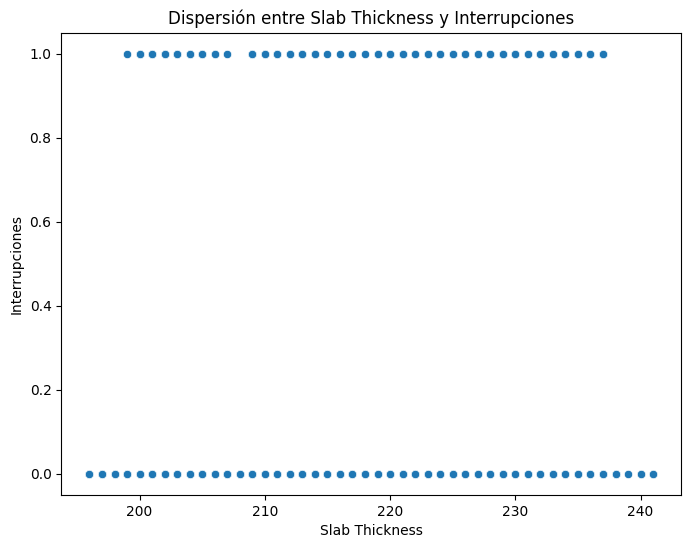

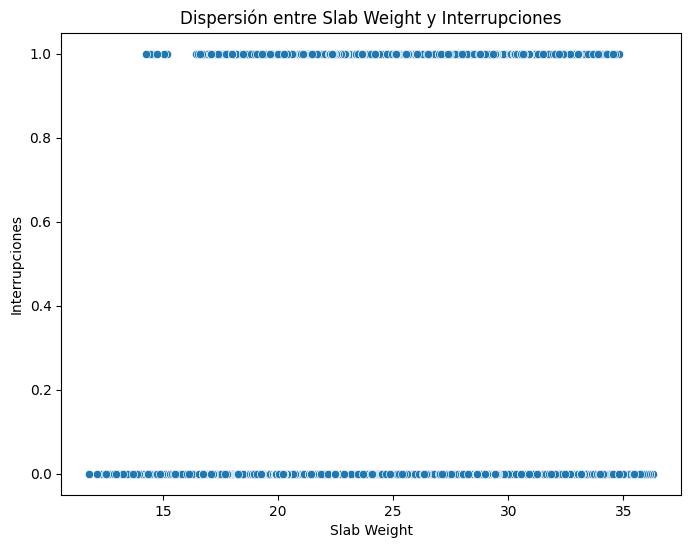

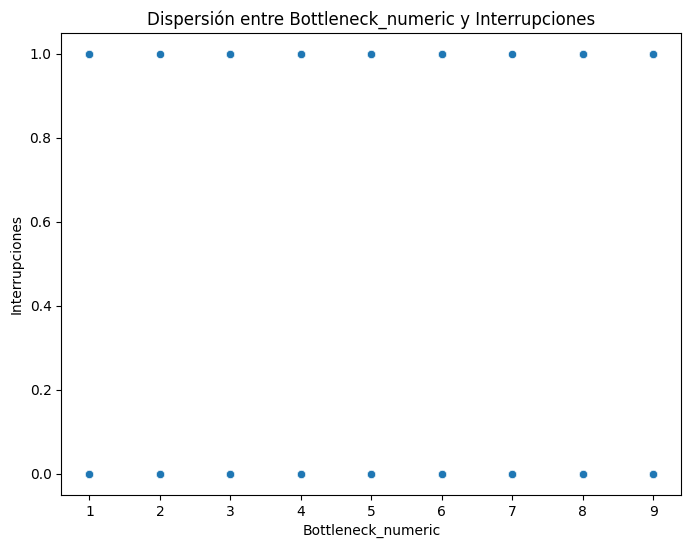

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Listar las columnas que se desean analizar contra 'Interrupciones'
variables = ['FCE Number', 'Slab Width', 'Slab Thickness', 'Slab Weight', 'Bottleneck_numeric']  # Ajusta según tus columnas

# Crear gráficos de dispersión para cada variable contra 'Interrupciones'
for var in variables:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=data[var], y=data['Interrupciones'])
    plt.title(f'Dispersión entre {var} y Interrupciones')
    plt.xlabel(var)
    plt.ylabel('Interrupciones')
    plt.show()

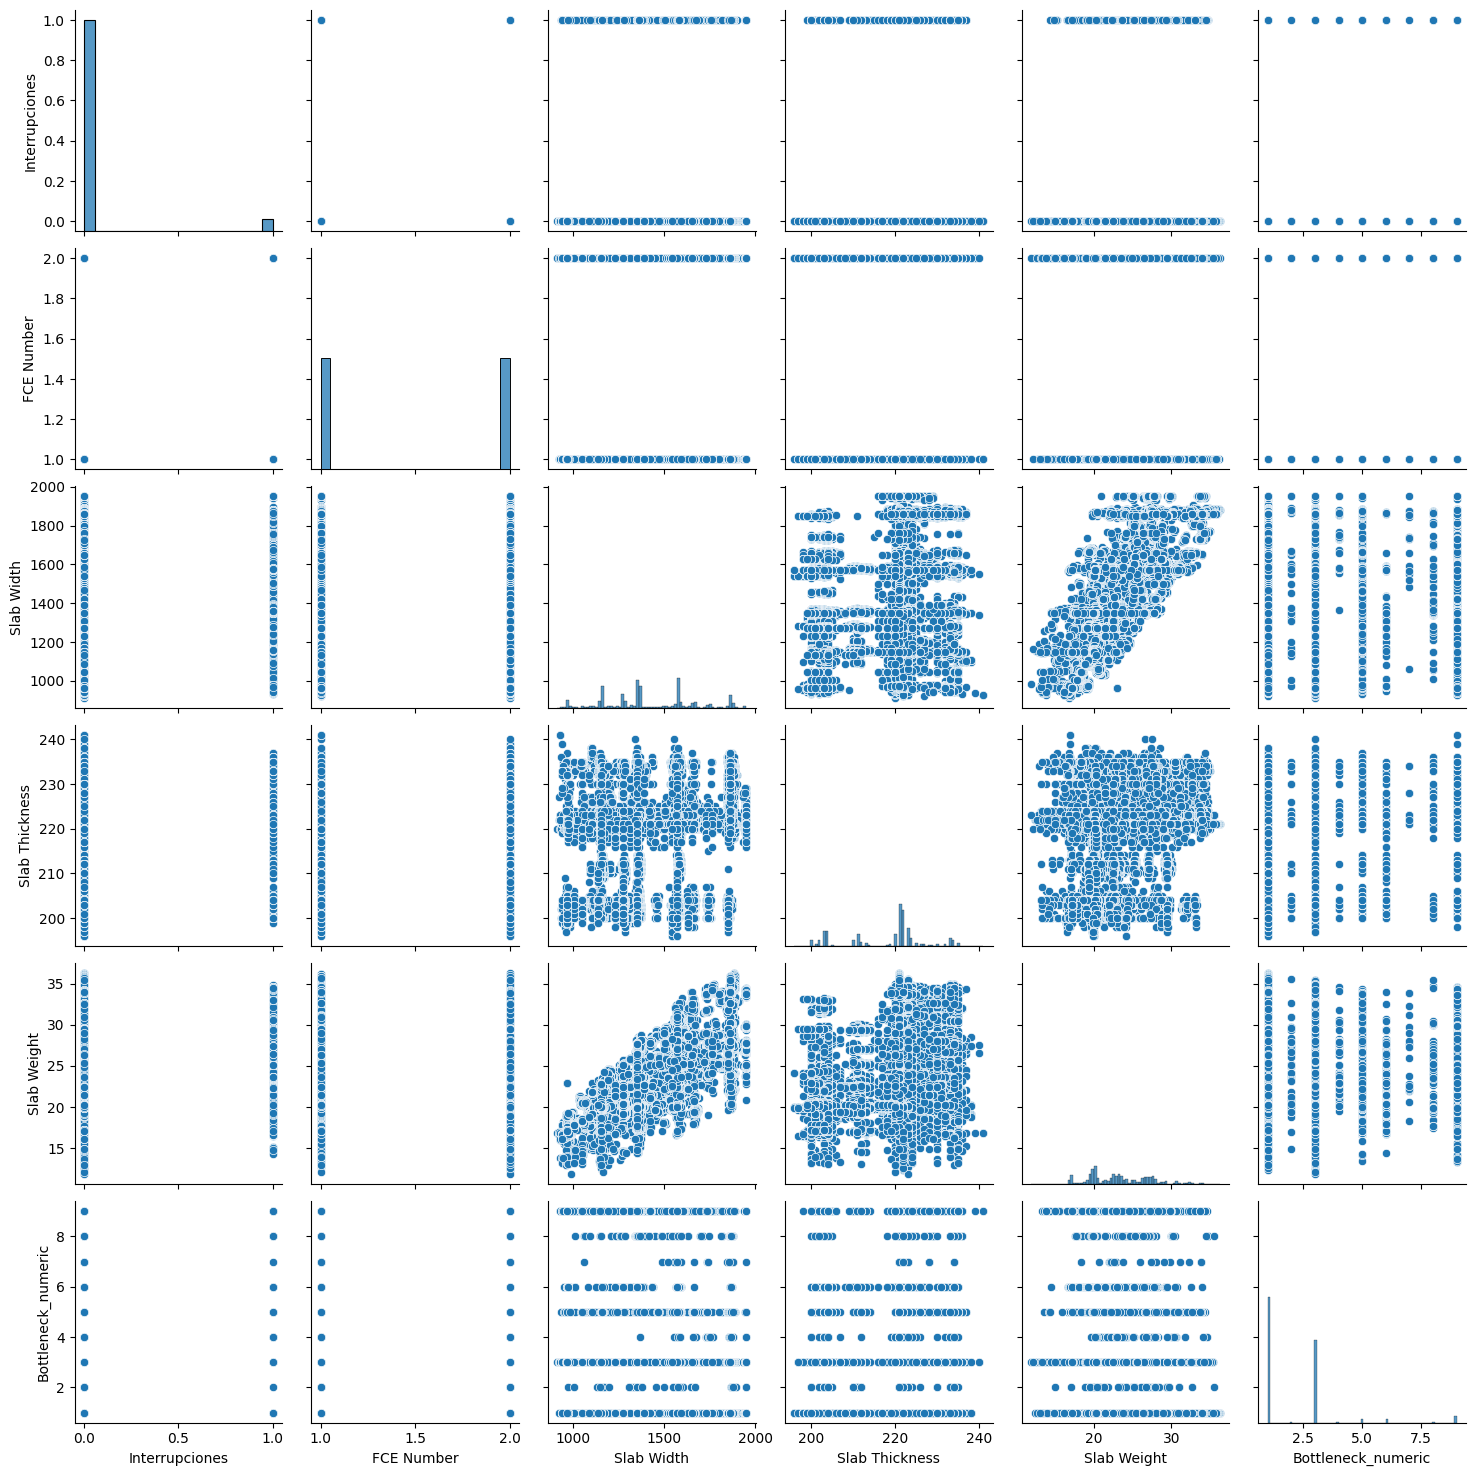

In [ ]:
# Crear un gráfico de pares para observar dependencias entre 'Interrupciones' y otras variables
sns.pairplot(data, vars=['Interrupciones', 'FCE Number', 'Slab Width', 'Slab Thickness', 'Slab Weight', 'Bottleneck_numeric'])
plt.show()

# Modelización

In [ ]:
# Calcular la matriz de correlación
correlation_matrix = data.corr()

# Extraer las correlaciones de la variable 'FM Thread Time'
FM_correlations = correlation_matrix['FM Thread Time']

# Ordenar las correlaciones de mayor a menor
FM_correlations_sorted = FM_correlations.sort_values(ascending=False)

# Mostrar las correlaciones ordenadas
print(FM_correlations_sorted)

FM Thread Time                 1.000000
1st Accel Time                 0.704730
Coil Thickness                 0.692724
FM Travel Pacing Time          0.575000
STD Interval Time              0.467072
Slab Width                     0.368901
Taper_Head_Width_Meas          0.362130
Taper_Tail_Width_Meas          0.362009
STD Cycle Time                 0.298635
SSP use                        0.271344
Slab Weight                    0.214291
Slab Thickness                 0.195998
SSP Pacing Time                0.170341
FM Procces Pacing Time         0.153860
Pacing Initial Value           0.114779
FCE Pacing Time                0.114620
SSP Width Head Error           0.110166
Pacing CountDown Time          0.105744
F7-F1 Time                     0.089459
FDTC                           0.084899
Delay Time                     0.078596
Demora                         0.048918
Interrupciones                 0.046241
SSP Width Tail Error           0.043879
R1 Pacing Time                 0.035365


In [ ]:
FM_correlations_sorted = FM_correlations.abs().sort_values(ascending=False)
FM_correlations_sorted

,FM Thread Time
FM Thread Time,1.000000
FM Thread Speed,0.876033
FM Final Speed,0.773652
1st Accel Time,0.704730
Coil Thickness,0.692724
FM Travel Pacing Time,0.575000
R2 Pacing Time,0.468276
STD Interval Time,0.467072
steel_type,0.443852
2nd Accel Time,0.436825


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Seleccionar las variables X y la variable objetivo y
X = data[['FM Thread Speed', 'FM Final Speed', '1st Accel Time', 'FM Travel Pacing Time',
          'R2 Pacing Time', 'steel_type', 'Slab Width', 'Taper_Head_Width_Meas',
          'Taper_Tail_Width_Meas', 'Slab Weight', 'Slab Lenght', 'Slab Thickness']]
y = data['FM Thread Time']

# Dividir los datos en conjuntos de entrenamiento y prueba (80% y 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Predecir en el conjunto de entrenamiento
y_train_pred = model.predict(X_train)
# Predecir en el conjunto de prueba
y_test_pred = model.predict(X_test)

# Evaluar el modelo con métricas de error de entrenamiento
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Evaluar el modelo con métricas de error de prueba
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test  = r2_score(y_test, y_test_pred)

#Conjunto de entrenamiento
print("Conjunto de entrenamiento: ")
print("Mean Squared Error (MSE):", mse_train)
print("R-squared (R2):", r2_train)

#Conjunto de prueba
print("Conjunto de prueba: ")
print("Mean Squared Error (MSE):", mse_test)
print("R-squared (R2):", r2_test)

# Coeficientes del modelo
coef_df = pd.DataFrame(model.coef_, X.columns, columns=['Coeficiente'])
print("\nCoeficientes del modelo:")
print(coef_df)

Conjunto de entrenamiento: 
Mean Squared Error (MSE): 2.563908576877576
R-squared (R2): 0.8241628857280849
Conjunto de prueba: 
Mean Squared Error (MSE): 2.6713390844233817
R-squared (R2): 0.8145730523951208

Coeficientes del modelo:
                       Coeficiente
FM Thread Speed          -1.315422
FM Final Speed            0.242559
1st Accel Time            0.046614
FM Travel Pacing Time     0.282664
R2 Pacing Time           -0.003016
steel_type                0.096135
Slab Width               -0.001023
Taper_Head_Width_Meas     0.001696
Taper_Tail_Width_Meas    -0.002070
Slab Weight               0.112008
Slab Lenght              -0.000117
Slab Thickness           -0.017385


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Seleccionar las variables X y la variable objetivo y (clasificación)
X = data[['FM Thread Speed', 'FM Final Speed', '1st Accel Time', 'FM Travel Pacing Time',
          'R2 Pacing Time', 'steel_type', 'Slab Width', 'Taper_Head_Width_Meas',
          'Taper_Tail_Width_Meas', 'Slab Weight', 'Slab Lenght', 'Slab Thickness']]

# Crear una nueva variable objetivo binaria: 1 si 'FM Thread Time' > media, 0 si no
y = (data['FM Thread Time'] > data['FM Thread Time'].mean()).astype(int)

# Dividir los datos en conjuntos de entrenamiento y prueba (80% y 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión logística
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)


# Predecir en el conjunto de entrenamiento
y_train_pred = log_model.predict(X_train)
# Predecir en el conjunto de prueba
y_test_pred = log_model.predict(X_test)

# Evaluar el modelo con métricas de clasificación
accuracy_train = accuracy_score(y_train, y_train_pred)
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
class_report_train = classification_report(y_train, y_train_pred)
print("Métricas de entrenamiento: ")
print("Accuracy:", accuracy_train)
print("Matriz de Confusión:\n", conf_matrix_train)
print("Reporte de Clasificación:\n", class_report_train)

# Evaluar el modelo con métricas de clasificación
accuracy_test = accuracy_score(y_test, y_test_pred)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
class_report_test = classification_report(y_test, y_test_pred)
print("Métricas de prueba: ")
print("Accuracy:", accuracy_test)
print("Matriz de Confusión:\n", conf_matrix_test)
print("Reporte de Clasificación:\n", class_report_test)

# Coeficientes del modelo
coef_df = pd.DataFrame(log_model.coef_.flatten(), X.columns, columns=['Coeficiente'])
print("\nCoeficientes del modelo:")
print(coef_df)


Métricas de entrenamiento: 
Accuracy: 0.9147009453131902
Matriz de Confusión:
 [[24669  1750]
 [ 2112 16745]]
Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.92      0.93      0.93     26419
           1       0.91      0.89      0.90     18857

    accuracy                           0.91     45276
   macro avg       0.91      0.91      0.91     45276
weighted avg       0.91      0.91      0.91     45276

Métricas de prueba: 
Accuracy: 0.90529198692464
Matriz de Confusión:
 [[6219  495]
 [ 577 4028]]
Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.92      0.93      0.92      6714
           1       0.89      0.87      0.88      4605

    accuracy                           0.91     11319
   macro avg       0.90      0.90      0.90     11319
weighted avg       0.91      0.91      0.91     11319


Coeficientes del modelo:
                       Coeficiente
FM Thread Speed         

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Importar las librerías necesarias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Paso 1: Separar características (X) y la variable objetivo (y)
X = data[['FM Thread Speed', 'FM Final Speed', '1st Accel Time', 'FM Travel Pacing Time',
          'R2 Pacing Time', 'steel_type', 'Slab Width', 'Taper_Head_Width_Meas',
          'Taper_Tail_Width_Meas', 'Slab Weight', 'Slab Lenght', 'Slab Thickness']]
y = (data['FM Thread Time'] > data['FM Thread Time'].mean()).astype(int)

# Paso 2: Dividir el conjunto de datos en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Paso 3: Escalar los datos
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Paso 4: Entrenar el modelo KNN con diferentes valores de K
k_values = [3, 5, 10]
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Predecir en el conjunto de prueba
    y_pred = knn.predict(X_test)

    # Evaluación
    print(f'Resultados para K={k}:')
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))



Resultados para K=3:
[[6323  391]
 [ 321 4284]]
              precision    recall  f1-score   support

           0       0.95      0.94      0.95      6714
           1       0.92      0.93      0.92      4605

    accuracy                           0.94     11319
   macro avg       0.93      0.94      0.93     11319
weighted avg       0.94      0.94      0.94     11319

Resultados para K=5:
[[6332  382]
 [ 293 4312]]
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      6714
           1       0.92      0.94      0.93      4605

    accuracy                           0.94     11319
   macro avg       0.94      0.94      0.94     11319
weighted avg       0.94      0.94      0.94     11319

Resultados para K=10:
[[6374  340]
 [ 378 4227]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.95      6714
           1       0.93      0.92      0.92      4605

    accuracy                         

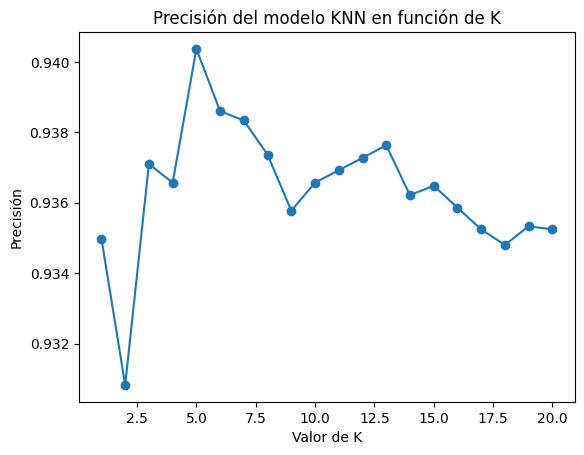

In [ ]:
# Paso 5: Visualizar cómo cambia la precisión con diferentes valores de k
accuracy_scores = []
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    accuracy_scores.append(knn.score(X_test, y_test))

# Graficar precisión vs k
plt.plot(range(1, 21), accuracy_scores, marker='o')
plt.title('Precisión del modelo KNN en función de K')
plt.xlabel('Valor de K')
plt.ylabel('Precisión')
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Datos X y la variable objetivo y
X = data[['FM Thread Speed', 'FM Final Speed', '1st Accel Time', 'FM Travel Pacing Time',
          'R2 Pacing Time', 'steel_type', 'Slab Width', 'Taper_Head_Width_Meas',
          'Taper_Tail_Width_Meas', 'Slab Weight', 'Slab Lenght', 'Slab Thickness']]
y = (data['FM Thread Time'] > data['FM Thread Time'].mean()).astype(int)

# Dividir los datos en conjuntos de entrenamiento y prueba (80% y 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = rf_model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Matriz de Confusión:\n", conf_matrix)
print("Reporte de Clasificación:\n", class_report)

# Importancia de las características (Feature Importance)
importances = rf_model.feature_importances_
feature_importances = pd.DataFrame(importances, index=X.columns, columns=['Importancia']).sort_values(by='Importancia', ascending=False)
print("\nImportancia de las características:")
print(feature_importances)

Accuracy: 0.9529110345436876
Matriz de Confusión:
 [[6417  297]
 [ 236 4369]]
Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96      6714
           1       0.94      0.95      0.94      4605

    accuracy                           0.95     11319
   macro avg       0.95      0.95      0.95     11319
weighted avg       0.95      0.95      0.95     11319


Importancia de las características:
                       Importancia
FM Thread Speed           0.318961
FM Final Speed            0.245184
1st Accel Time            0.174903
FM Travel Pacing Time     0.061374
steel_type                0.043197
R2 Pacing Time            0.031107
Slab Width                0.023907
Taper_Tail_Width_Meas     0.022665
Slab Lenght               0.022489
Slab Weight               0.021549
Taper_Head_Width_Meas     0.018854
Slab Thickness            0.015811


In [ ]:
# media de FM Thread time
data['FM Thread Time'].mean()

15.886133050622846

Text(0.5, 1.0, 'Distribución de FM Thread Time')

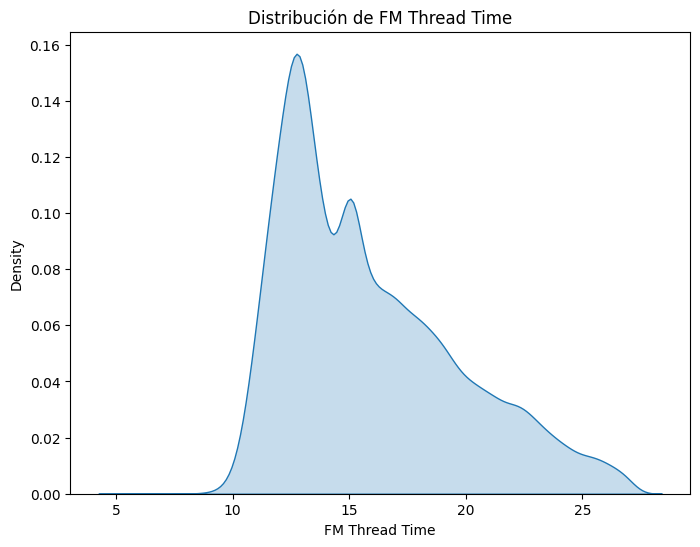

In [ ]:
# grafico de densidad de FM Thread Time
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.kdeplot(data=data, x='FM Thread Time', fill=True)
plt.title('Distribución de FM Thread Time')


# ANOVA e Intervalos de Confianza



Resultados del ANOVA:
F-statistic: 7303.531137960513, p-value: 0.0


<ipython-input-25-3cfd8282b5a9>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='steel_type', y='FM Thread Time', data=data, palette='Set2')


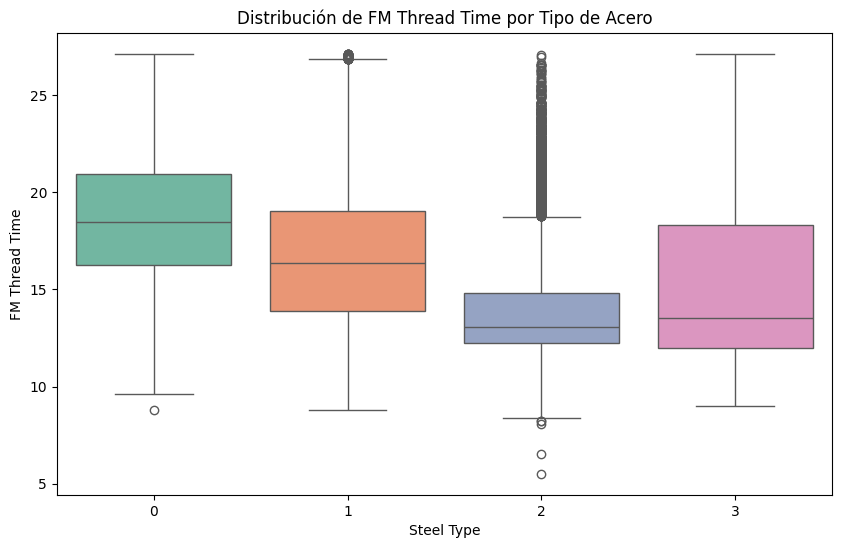

In [ ]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Asegurarnos de que 'steel_type' esté tratada como categoría
data['steel_type'] = data['steel_type'].astype('category')

# Realizar el ANOVA para la variable 'FM Thread Time' según 'steel_type'
anova_result = stats.f_oneway(
    *[data.loc[data['steel_type'] == steel, 'FM Thread Time'] for steel in data['steel_type'].unique()]
)

print("Resultados del ANOVA:")
print(f"F-statistic: {anova_result.statistic}, p-value: {anova_result.pvalue}")

# Visualización de los resultados del ANOVA con un boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='steel_type', y='FM Thread Time', data=data, palette='Set2')
plt.title('Distribución de FM Thread Time por Tipo de Acero')
plt.xlabel('Steel Type')
plt.ylabel('FM Thread Time')
plt.show()



In [ ]:
# Obtener las predicciones para cada modelo
lin_preds = model.predict(X_test)
log_preds = log_model.predict(X_test)
rf_preds = rf_model.predict(X_test)

# Convertir las predicciones en un DataFrame
predictions_df = pd.DataFrame({
    'LinearRegression': lin_preds,
    'LogisticRegression': log_preds,
    'RandomForest': rf_preds,
    'Actual': y_test
})

# Calcular ANOVA (Análisis de Varianza) entre los tres modelos
anova_result = stats.f_oneway(predictions_df['LinearRegression'],
                              predictions_df['LogisticRegression'],
                              predictions_df['RandomForest'])
print("ANOVA results:", anova_result)


ANOVA results: F_onewayResult(statistic=217440.70422388287, pvalue=0.0)


In [ ]:
from sklearn.inspection import permutation_importance
import numpy as np

# Calculamos la importancia permutada en el conjunto de prueba
perm_importance = permutation_importance(rf_model, X_test, y_test, n_repeats=30, random_state=42)

# Extraemos las importancias y sus intervalos de confianza
sorted_idx = perm_importance.importances_mean.argsort()[::-1]  # Ordenar de mayor a menor

print("\nImportancia permutada de las características con intervalos de confianza:")
for idx in sorted_idx:
    feature_name = X.columns[idx]
    mean_importance = perm_importance.importances_mean[idx]
    std_importance = perm_importance.importances_std[idx]
    confidence_interval = (mean_importance - 1.96 * std_importance, mean_importance + 1.96 * std_importance)

    print(f"{feature_name}: {mean_importance:.4f} (95% CI: {confidence_interval[0]:.4f}, {confidence_interval[1]:.4f})")



Importancia permutada de las características con intervalos de confianza:
FM Thread Speed: 0.2191 (95% CI: 0.2119, 0.2262)
FM Travel Pacing Time: 0.0459 (95% CI: 0.0425, 0.0493)
FM Final Speed: 0.0110 (95% CI: 0.0093, 0.0127)
1st Accel Time: 0.0090 (95% CI: 0.0074, 0.0106)
steel_type: 0.0057 (95% CI: 0.0039, 0.0075)
R2 Pacing Time: 0.0051 (95% CI: 0.0038, 0.0064)
Slab Thickness: 0.0047 (95% CI: 0.0035, 0.0059)
Slab Weight: 0.0033 (95% CI: 0.0021, 0.0046)
Slab Lenght: 0.0031 (95% CI: 0.0016, 0.0046)
Slab Width: 0.0026 (95% CI: 0.0016, 0.0036)
Taper_Tail_Width_Meas: 0.0026 (95% CI: 0.0017, 0.0034)
Taper_Head_Width_Meas: 0.0015 (95% CI: 0.0003, 0.0026)


In [ ]:
# Calcular los intervalos de confianza para los coeficientes del modelo de regresión logística
coef = log_model.coef_.flatten()  # Coeficientes del modelo
std_err = np.sqrt(np.diag(np.linalg.inv(np.dot(X_train.T, X_train))))  # Estimación de error estándar
z = 1.96  # Valor z para un intervalo de confianza del 95%

confidence_intervals = []
for i, c in enumerate(coef):
    lower_bound = c - z * std_err[i]
    upper_bound = c + z * std_err[i]
    confidence_intervals.append((X.columns[i], lower_bound, upper_bound))

# Mostrar los coeficientes con sus intervalos de confianza
print("\nIntervalos de confianza para los coeficientes del modelo de regresión logística:")
for variable, lower, upper in confidence_intervals:
    print(f"{variable}: ({lower:.4f}, {upper:.4f})")


Intervalos de confianza para los coeficientes del modelo de regresión logística:
FM Thread Speed: (-0.5301, -0.5076)
FM Final Speed: (-0.1309, -0.1182)
1st Accel Time: (0.1387, 0.1415)
FM Travel Pacing Time: (0.3100, 0.3184)
R2 Pacing Time: (-0.0551, -0.0498)
steel_type: (-0.3329, -0.3108)
Slab Width: (-0.0018, -0.0013)
Taper_Head_Width_Meas: (0.0009, 0.0033)
Taper_Tail_Width_Meas: (-0.0033, -0.0009)
Slab Weight: (0.1032, 0.1163)
Slab Lenght: (-0.0001, -0.0000)
Slab Thickness: (-0.0175, -0.0158)


In [ ]:
# Groupby steeltype y mean
data.groupby('steel_type')['FM Thread Time'].mean()

<ipython-input-29-0409ff214d20>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby('steel_type')['FM Thread Time'].mean()


,FM Thread Time
steel_type,
0,18.695962
1,16.889666
2,13.711688
3,15.352175
